In [305]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2, RFE, SelectFromModel, VarianceThreshold
from sklearn.linear_model import LassoCV, LogisticRegression, LinearRegression, SGDClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, learning_curve
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, mean_absolute_error, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn.gaussian_process import GaussianProcessClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

In [306]:
df = pd.read_csv("/home/hasan/Data Set/Heart Disease/heart.csv")
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [307]:
print("Shape of the dataset is :", df.shape)

Shape of the dataset is : (303, 14)


In [308]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [309]:
df.describe([0.05, 0.95])

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
5%      39.100000    0.000000    0.000000  108.000000  175.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
95%     68.000000    1.000000    3.000000  160.000000  326.900000    1.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
5%       0.000000  108.100000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
95%      1.000000  181.900000    1.000000    3.400000    2.000000    3.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
5%       1.000000    0.000000  
50%      2.000000    1.000000  
95%      3.000000    1.000000  
max      3.000000    1.000000

In [310]:
# data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Handling duplicate data

In [311]:
df.duplicated().sum()

1

In [312]:
df.drop_duplicates(inplace=True)
print("number of duplicated data after dropping :",df.duplicated().sum())

number of duplicated data after dropping : 0


### Checking level or unlevel

<AxesSubplot:xlabel='target', ylabel='count'>

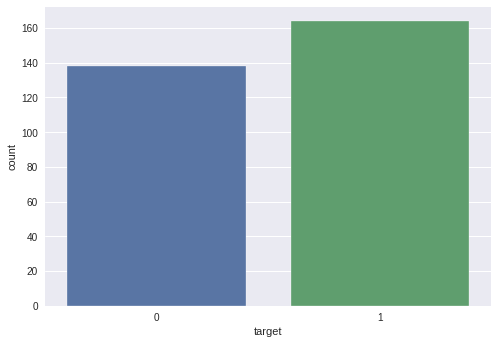

In [313]:
sns.countplot(x='target', data=df)

### Increasing Feature

In [314]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [315]:
def fe_creation(df):
    df['age2'] = df['age']//10
    df['trestbps2'] = df['trestbps']//10 #10
    df['chol2'] = df['chol']//40
    df['thalach2'] = df['thalach']//40
    df['oldpeak2'] = df['oldpeak']//0.4
    for i in ['sex', 'age2', 'fbs', 'restecg', 'exang','thal', ]:
        for j in ['cp','trestbps2', 'chol2', 'thalach2', 'oldpeak2', 'slope', 'ca']:
            df[i + "_" + j] = df[i].astype('str') + "_" + df[j].astype('str')
    return df

data = fe_creation(df)

In [316]:
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  ...  exang_trestbps2  exang_chol2  exang_thalach2  \
0   0     1  ...             0_14          0_5             0_3   
1   0     2  ...             0_13          0_6             0_4   
2   0     2  ...             0_13          0_5             0_4   
3   0     2  ...             0_12          0_5             0_4   
4   0     2  ...             1_12          1_8             1_4   

   exang_oldpeak2  exang_slope  exang_ca thal_cp thal_trestbps2 thal_chol2  \
0           0_5.0          0_0       0_0     1_3           1_14        1_5   
1           0_8.0          0_0       0_0     2_2           2_13        2_6   
2           0_3.0          0_2       0_0     2_1           2_13        2_5   
3           0_2.0          0_2       0_0     2_1           2_12        2_5   
4           1_1.0          1_2       1_0     2_0           2_12        2_8   

  thal_thalach2 thal_oldpeak2 thal_slope thal_ca  
0           1_3         1_5.0        1_0     1_0  
1           2_4         2_8.0        2_0     2_0  
2           2_4         2_3.0        2_2     2_0  
3           2_4         2_2.0        2_2     2_0  
4           2_4         2_1.0        2_2     2_0  

[5 rows x 61 columns]

### Categorical Features

In [317]:
# Determination categorical features
categorical_columns = []
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
features = data.columns.values.tolist()

for col in features:
    if data[col].dtype in numerics: continue
    categorical_columns.append(col)
    
categorical_columns

['sex_cp',
 'sex_trestbps2',
 'sex_chol2',
 'sex_thalach2',
 'sex_oldpeak2',
 'sex_slope',
 'sex_ca',
 'age2_cp',
 'age2_trestbps2',
 'age2_chol2',
 'age2_thalach2',
 'age2_oldpeak2',
 'age2_slope',
 'age2_ca',
 'fbs_cp',
 'fbs_trestbps2',
 'fbs_chol2',
 'fbs_thalach2',
 'fbs_oldpeak2',
 'fbs_slope',
 'fbs_ca',
 'restecg_cp',
 'restecg_trestbps2',
 'restecg_chol2',
 'restecg_thalach2',
 'restecg_oldpeak2',
 'restecg_slope',
 'restecg_ca',
 'exang_cp',
 'exang_trestbps2',
 'exang_chol2',
 'exang_thalach2',
 'exang_oldpeak2',
 'exang_slope',
 'exang_ca',
 'thal_cp',
 'thal_trestbps2',
 'thal_chol2',
 'thal_thalach2',
 'thal_oldpeak2',
 'thal_slope',
 'thal_ca']

### Encoding of categorical features

In [318]:
for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        le.fit(list(data[col].astype(str).values))
        data[col] = le.transform(list(data[col].astype(str).values))
        

In [319]:
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  ...  exang_trestbps2  exang_chol2  exang_thalach2  \
0   0     1  ...                4            4               2   
1   0     2  ...                3            5               3   
2   0     2  ...                3            4               3   
3   0     2  ...                2            4               3   
4   0     2  ...               12           15               7   

   exang_oldpeak2  exang_slope  exang_ca  thal_cp  thal_trestbps2  thal_chol2  \
0               8            0         0        5               4           2   
1              11            0         0        8              11           9   
2               6            2         0        7              11           8   
3               5            2         0        7              10           8   
4              14            5         5        6              10          11   

   thal_thalach2  thal_oldpeak2  thal_slope  thal_ca  
0              3              8           2        1  
1              8             18           5        5  
2              8             13           7        5  
3              8             12           7        5  
4              8             11           7        5  

[5 rows x 61 columns]

In [320]:
print("Shape of data is :", data.shape)

Shape of data is : (302, 61)


### Feature and Label dataset

In [321]:
train = data.drop('target', axis=1)
target = data.target

### Feature Selection with the Pearson correlation

In [322]:
num_features_opt = 25
num_features_max = 35
features_best = []


In [323]:
threshold = 0.9

def highlight(value):
    if value > threshold:
        style = 'background-color: pink'
    else:
        style = 'background-color: palegreen'
    return style

# Absolute value correlation matrix
corr_matrix = data.corr().abs().round(2)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.style.format("{:.2f}").applymap(highlight)


In [324]:
# Select columns with correlations above threshold
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]
features_filtered = data.drop(columns = collinear_features)
print('The number of features that passed the collinearity threshold: ', features_filtered.shape[1])
features_best.append(features_filtered.columns.tolist())

The number of features that passed the collinearity threshold:  29


### FS by the SelectFromModel with LinearSVC

In [325]:
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(train, target)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(train)
X_selected_df = pd.DataFrame(X_new, columns=[train.columns[i] for i in range(len(train.columns)) if model.get_support()[i]])
features_best.append(X_selected_df.columns.tolist())

### FS by the SelectFromModel with Lasso 

In [326]:
lasso = LassoCV(cv=3).fit(train, target)
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(train)
X_selected_df = pd.DataFrame(X_new, columns=[train.columns[i] for i in range(len(train.columns)) if model.get_support()[i]])
features_best.append(X_selected_df.columns.tolist())

### FS by the SelectKBest with Chi-2 

In [327]:
# Visualization from https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
# but to k='all'
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(train, target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
features_best.append(featureScores.nlargest(num_features_max,'Score')['Feature'].tolist())
print(featureScores.nlargest(len(dfcolumns),'Score')) 


              Feature       Score
50     exang_oldpeak2  652.854396
52           exang_ca  263.212119
22       sex_oldpeak2  252.657949
57      thal_oldpeak2  247.914913
47    exang_trestbps2  241.749732
7             thalach  186.180286
17           oldpeak2  171.486400
36       fbs_oldpeak2  164.898970
29      age2_oldpeak2  139.151372
48        exang_chol2  131.365522
54     thal_trestbps2  116.884620
55         thal_chol2  113.985724
59            thal_ca   90.668503
19      sex_trestbps2   78.162433
24             sex_ca   77.302537
9             oldpeak   71.692782
11                 ca   71.020719
2                  cp   62.116086
31            age2_ca   54.956199
26     age2_trestbps2   53.221349
39         restecg_cp   51.837075
38             fbs_ca   43.441045
8               exang   38.518849
27         age2_chol2   36.438097
20          sex_chol2   35.823916
32             fbs_cp   32.072291
42   restecg_thalach2   29.718076
49     exang_thalach2   27.279766
0             

### FS by the Recursive Feature Elimination (RFE) with Logistic Regression

In [328]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_features_max, step=10, verbose=5)
rfe_selector.fit(train, target)
rfe_support = rfe_selector.get_support()
rfe_feature = train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')


Fitting estimator with 60 features.
Fitting estimator with 50 features.
Fitting estimator with 40 features.
35 selected features


In [329]:
features_best.append(rfe_feature)

### FS by the Recursive Feature Elimination (RFE) with Random Forest

In [330]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=200), threshold='1.25*median')
embeded_rf_selector.fit(train, target)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=200),
                threshold='1.25*median')

In [331]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

25 selected features


In [332]:
features_best.append(embeded_rf_feature)

### FS by the VarianceThreshold

In [333]:
# Check whether all features have a sufficiently different meaning
selector = VarianceThreshold(threshold=10)
np.shape(selector.fit_transform(data))
features_best.append(list(np.array(data.columns)[selector.get_support(indices=False)]))

### Selection the best features

In [334]:
features_best

[['age',
  'sex',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalach',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal',
  'target',
  'thalach2',
  'sex_cp',
  'sex_oldpeak2',
  'sex_ca',
  'fbs_cp',
  'fbs_thalach2',
  'fbs_oldpeak2',
  'fbs_slope',
  'fbs_ca',
  'restecg_cp',
  'restecg_oldpeak2',
  'exang_cp',
  'exang_oldpeak2',
  'exang_slope',
  'thal_oldpeak2'],
 ['age',
  'trestbps',
  'chol',
  'thalach',
  'ca',
  'sex_ca',
  'age2_cp',
  'age2_ca',
  'fbs_cp',
  'restecg_cp',
  'exang_ca',
  'thal_cp',
  'thal_chol2',
  'thal_oldpeak2',
  'thal_slope'],
 ['age',
  'trestbps',
  'chol',
  'thalach',
  'ca',
  'sex_ca',
  'age2_cp',
  'age2_oldpeak2',
  'age2_ca',
  'fbs_trestbps2',
  'restecg_trestbps2',
  'exang_ca',
  'thal_cp',
  'thal_chol2',
  'thal_oldpeak2',
  'thal_slope'],
 ['exang_oldpeak2',
  'exang_ca',
  'sex_oldpeak2',
  'thal_oldpeak2',
  'exang_trestbps2',
  'thalach',
  'oldpeak2',
  'fbs_oldpeak2',
  'age2_oldpeak2',
  'exang_chol2',
  'tha

In [335]:
# The element is in at least one list of optimal features
main_cols_max = features_best[0]
for i in range(len(features_best)-1):
    main_cols_max = list(set(main_cols_max) | set(features_best[i+1]))
main_cols_max

['fbs_chol2',
 'exang_thalach2',
 'thal_cp',
 'exang_oldpeak2',
 'fbs_cp',
 'thal_trestbps2',
 'thal_chol2',
 'restecg_slope',
 'exang_trestbps2',
 'slope',
 'thal_thalach2',
 'age2_cp',
 'fbs',
 'sex_slope',
 'thal_oldpeak2',
 'restecg',
 'exang_ca',
 'chol2',
 'exang',
 'sex_thalach2',
 'oldpeak',
 'trestbps',
 'age2_thalach2',
 'fbs_oldpeak2',
 'thal_slope',
 'sex_trestbps2',
 'ca',
 'thalach2',
 'thal_ca',
 'restecg_thalach2',
 'chol',
 'restecg_cp',
 'target',
 'age2_trestbps2',
 'restecg_trestbps2',
 'age2_oldpeak2',
 'thalach',
 'thal',
 'fbs_thalach2',
 'exang_cp',
 'age2_slope',
 'exang_chol2',
 'cp',
 'sex_ca',
 'fbs_trestbps2',
 'sex_oldpeak2',
 'restecg_oldpeak2',
 'restecg_ca',
 'sex_cp',
 'fbs_slope',
 'sex',
 'age2',
 'restecg_chol2',
 'age',
 'age2_ca',
 'sex_chol2',
 'fbs_ca',
 'oldpeak2',
 'exang_slope',
 'age2_chol2']

In [336]:
len(main_cols_max)

60

In [337]:
# The element is in all lists of optimal features
main_cols_min = features_best[0]
for i in range(len(features_best)-1):
    main_cols_min = list(set(main_cols_min).intersection(set(features_best[i+1])))
main_cols_min


['thalach', 'age', 'thal_oldpeak2']

In [338]:
# Most common items in all lists of optimal features
main_cols = []
main_cols_opt = {feature_name : 0 for feature_name in data.columns.tolist()}
for i in range(len(features_best)):
    for feature_name in features_best[i]:
        main_cols_opt[feature_name] += 1
df_main_cols_opt = pd.DataFrame.from_dict(main_cols_opt, orient='index', columns=['Num'])
df_main_cols_opt.sort_values(by=['Num'], ascending=False).head(num_features_opt)

Num
age               7
thal_oldpeak2     7
thalach           7
thal_chol2        6
ca                6
chol              6
sex_ca            6
exang_ca          5
sex_oldpeak2      5
trestbps          5
restecg_cp        5
age2_ca           5
thal_slope        4
thal_trestbps2    4
thal_cp           4
exang_oldpeak2    4
exang_cp          4
fbs_ca            4
fbs_oldpeak2      4
fbs_cp            4
age2_cp           4
exang_chol2       4
age2_oldpeak2     4
cp                4
thal_ca           3

In [339]:
main_cols = df_main_cols_opt.nlargest(num_features_opt, 'Num').index.tolist()
if not 'target' in main_cols:
    main_cols.append('target')
main_cols


['age',
 'thalach',
 'thal_oldpeak2',
 'chol',
 'ca',
 'sex_ca',
 'thal_chol2',
 'trestbps',
 'sex_oldpeak2',
 'age2_ca',
 'restecg_cp',
 'exang_ca',
 'cp',
 'age2_cp',
 'age2_oldpeak2',
 'fbs_cp',
 'fbs_oldpeak2',
 'fbs_ca',
 'exang_cp',
 'exang_chol2',
 'exang_oldpeak2',
 'thal_cp',
 'thal_trestbps2',
 'thal_slope',
 'oldpeak',
 'target']

# EDA for Model selection

In [340]:
pd.set_option('max_columns', len(main_cols)+1)
len(main_cols)


26

In [341]:
data.to_csv('data_EDA.csv', index=False)

Shape of your Data Set: (302, 61)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 302 rows, 60 cols
Too many columns to print
    Numeric Columns: ['oldpeak', 'oldpeak2']
    Integer-Categorical Columns: ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'slope', 'ca', 'thal', 'age2', 'trestbps2', 'chol2', 'thalach2', 'sex_cp', 'sex_trestbps2', 'sex_chol2', 'sex_thalach2', 'sex_oldpeak2', 'sex_slope', 'sex_ca', 'age2_cp', 'age2_trestbps2', 'age2_chol2', 'age2_thalach2', 'age2_oldpeak2', 'age2_slope', 'age2_ca', 'fbs_cp', 'fbs_trestbps2', 'fbs_chol2']
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: ['sex', 'fbs', 'exang']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: []
    Columns that will not be considered in modeling: []
    60 Predictors classified...
        Thi

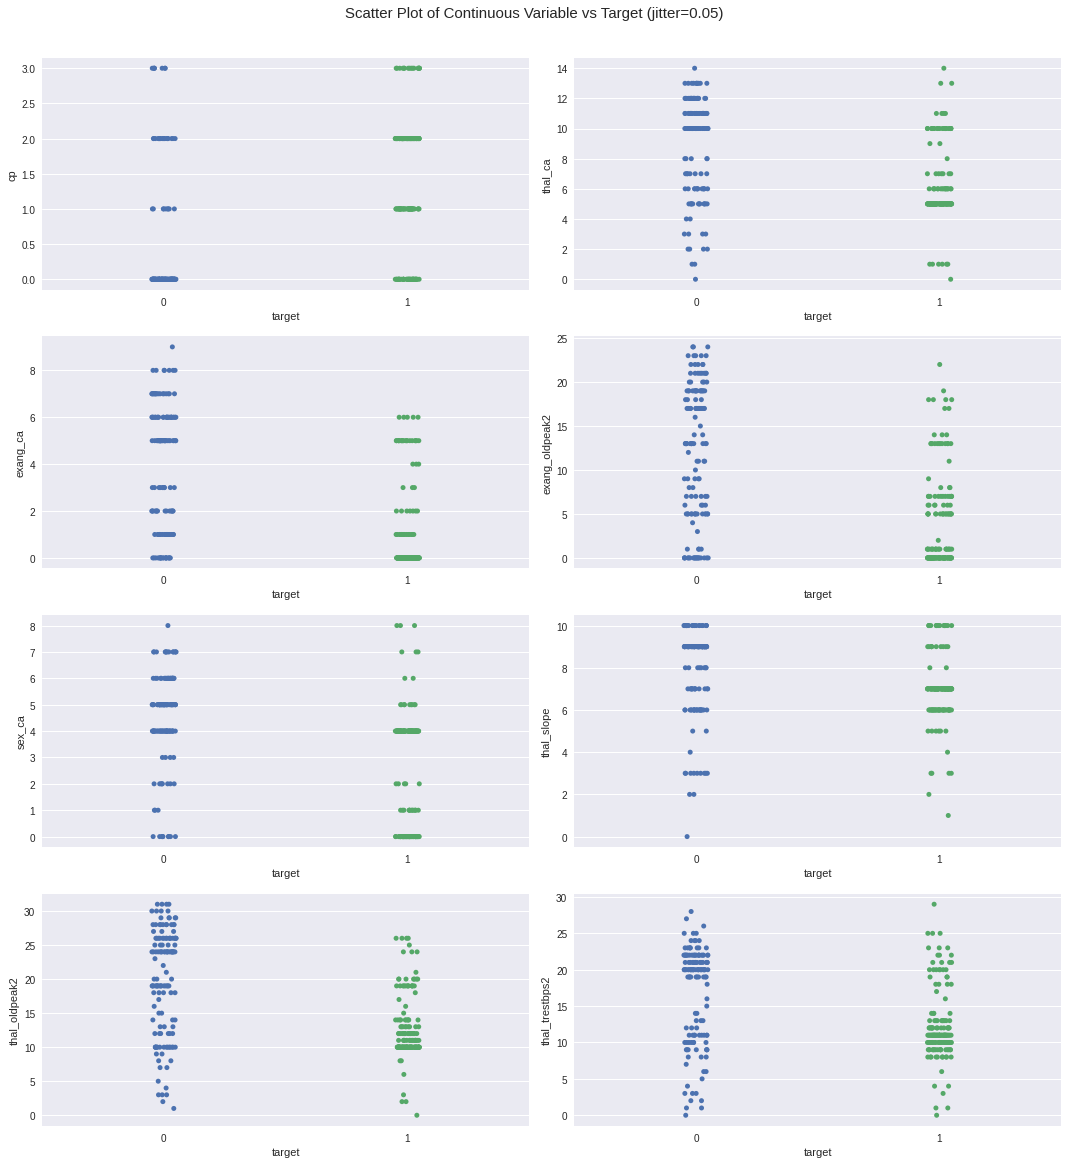

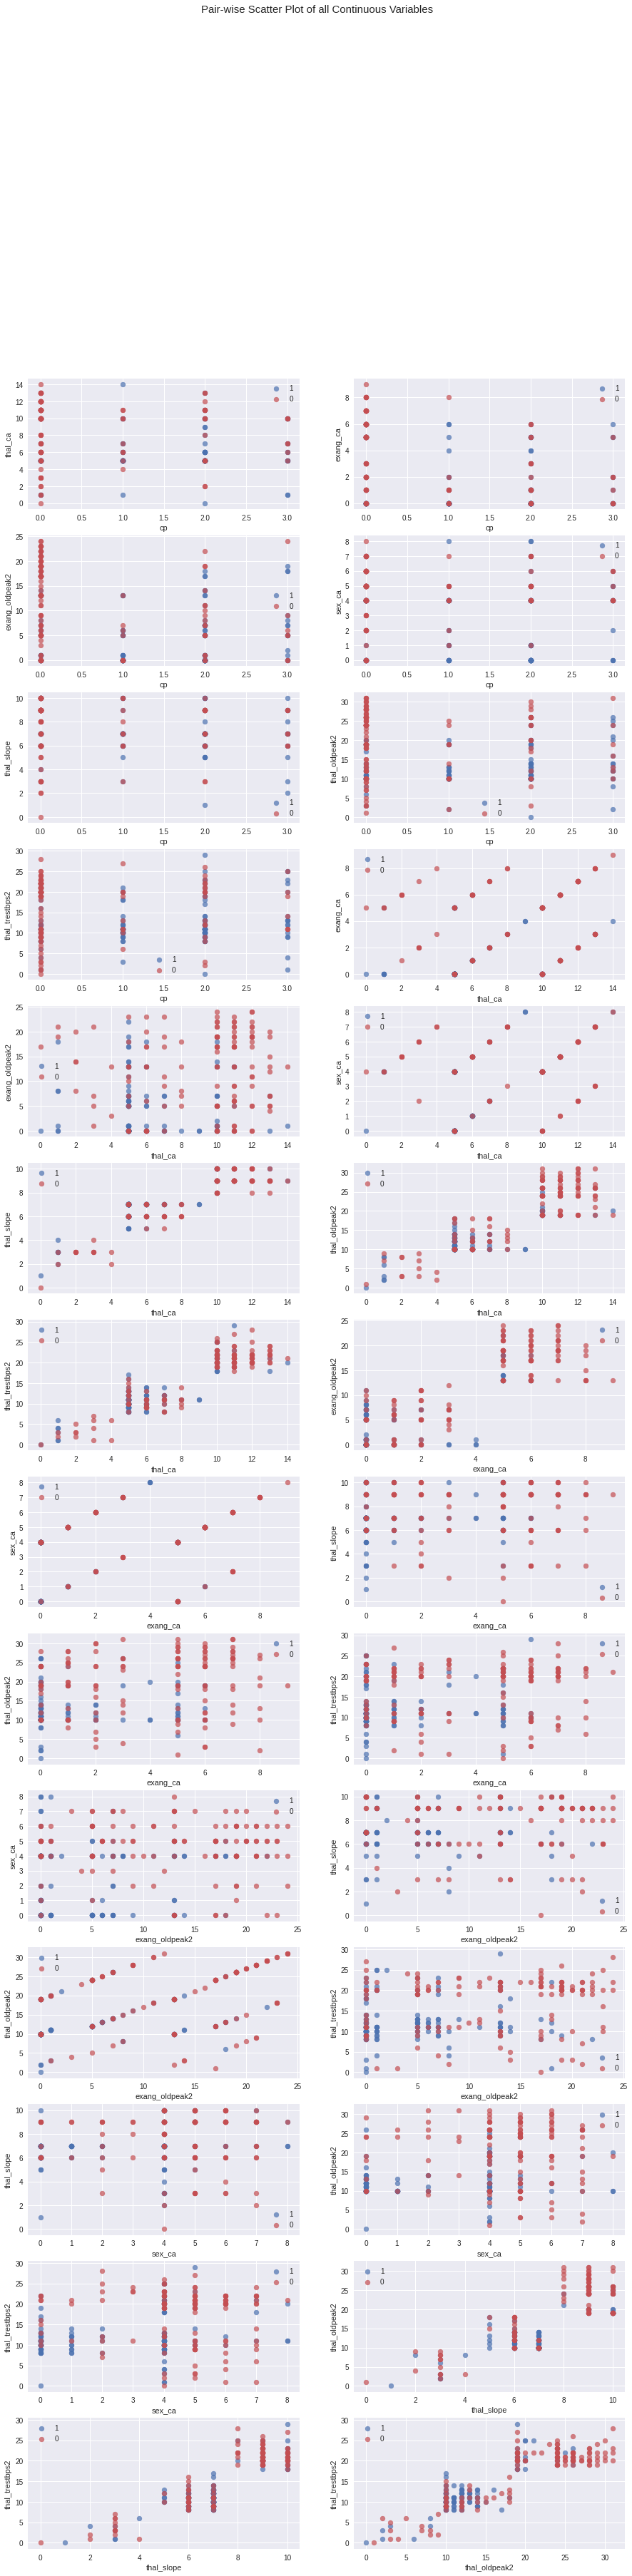

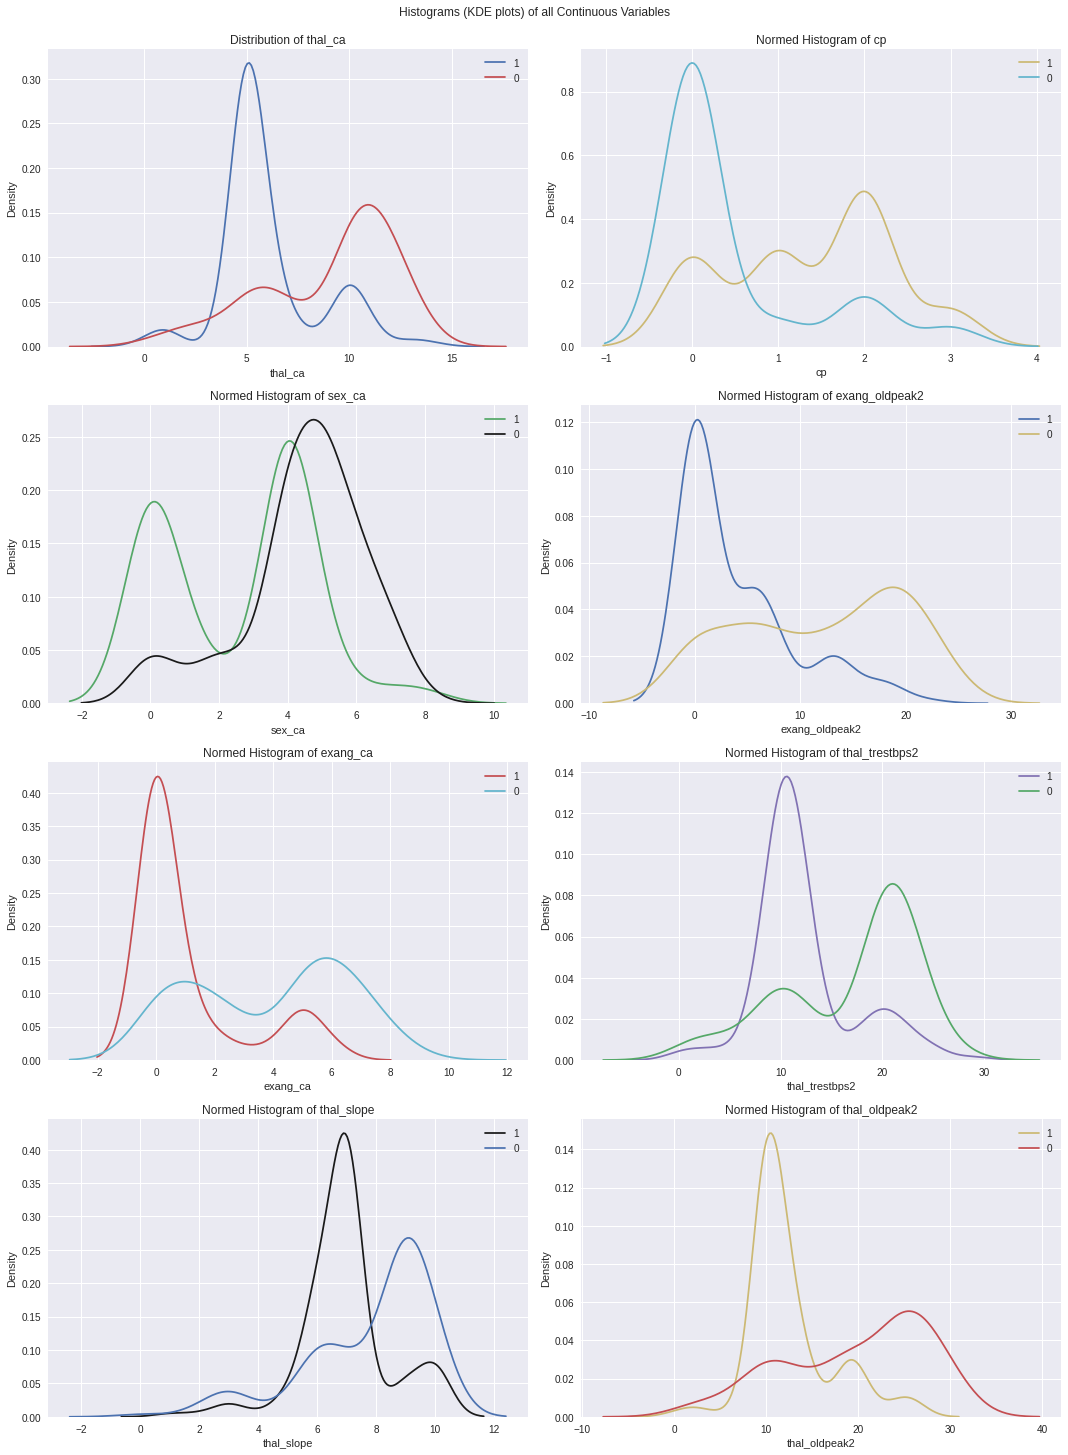

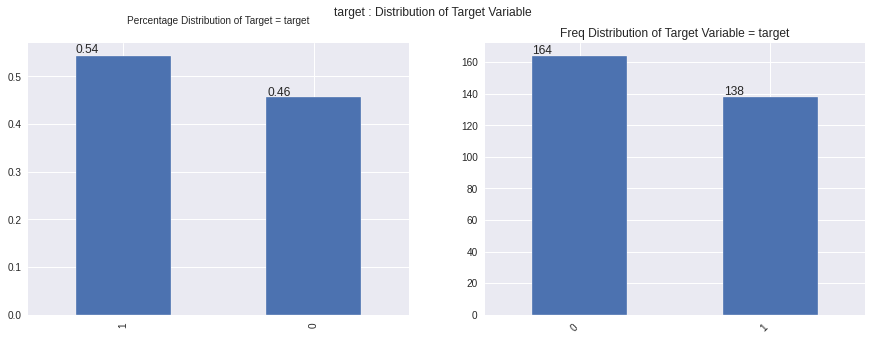

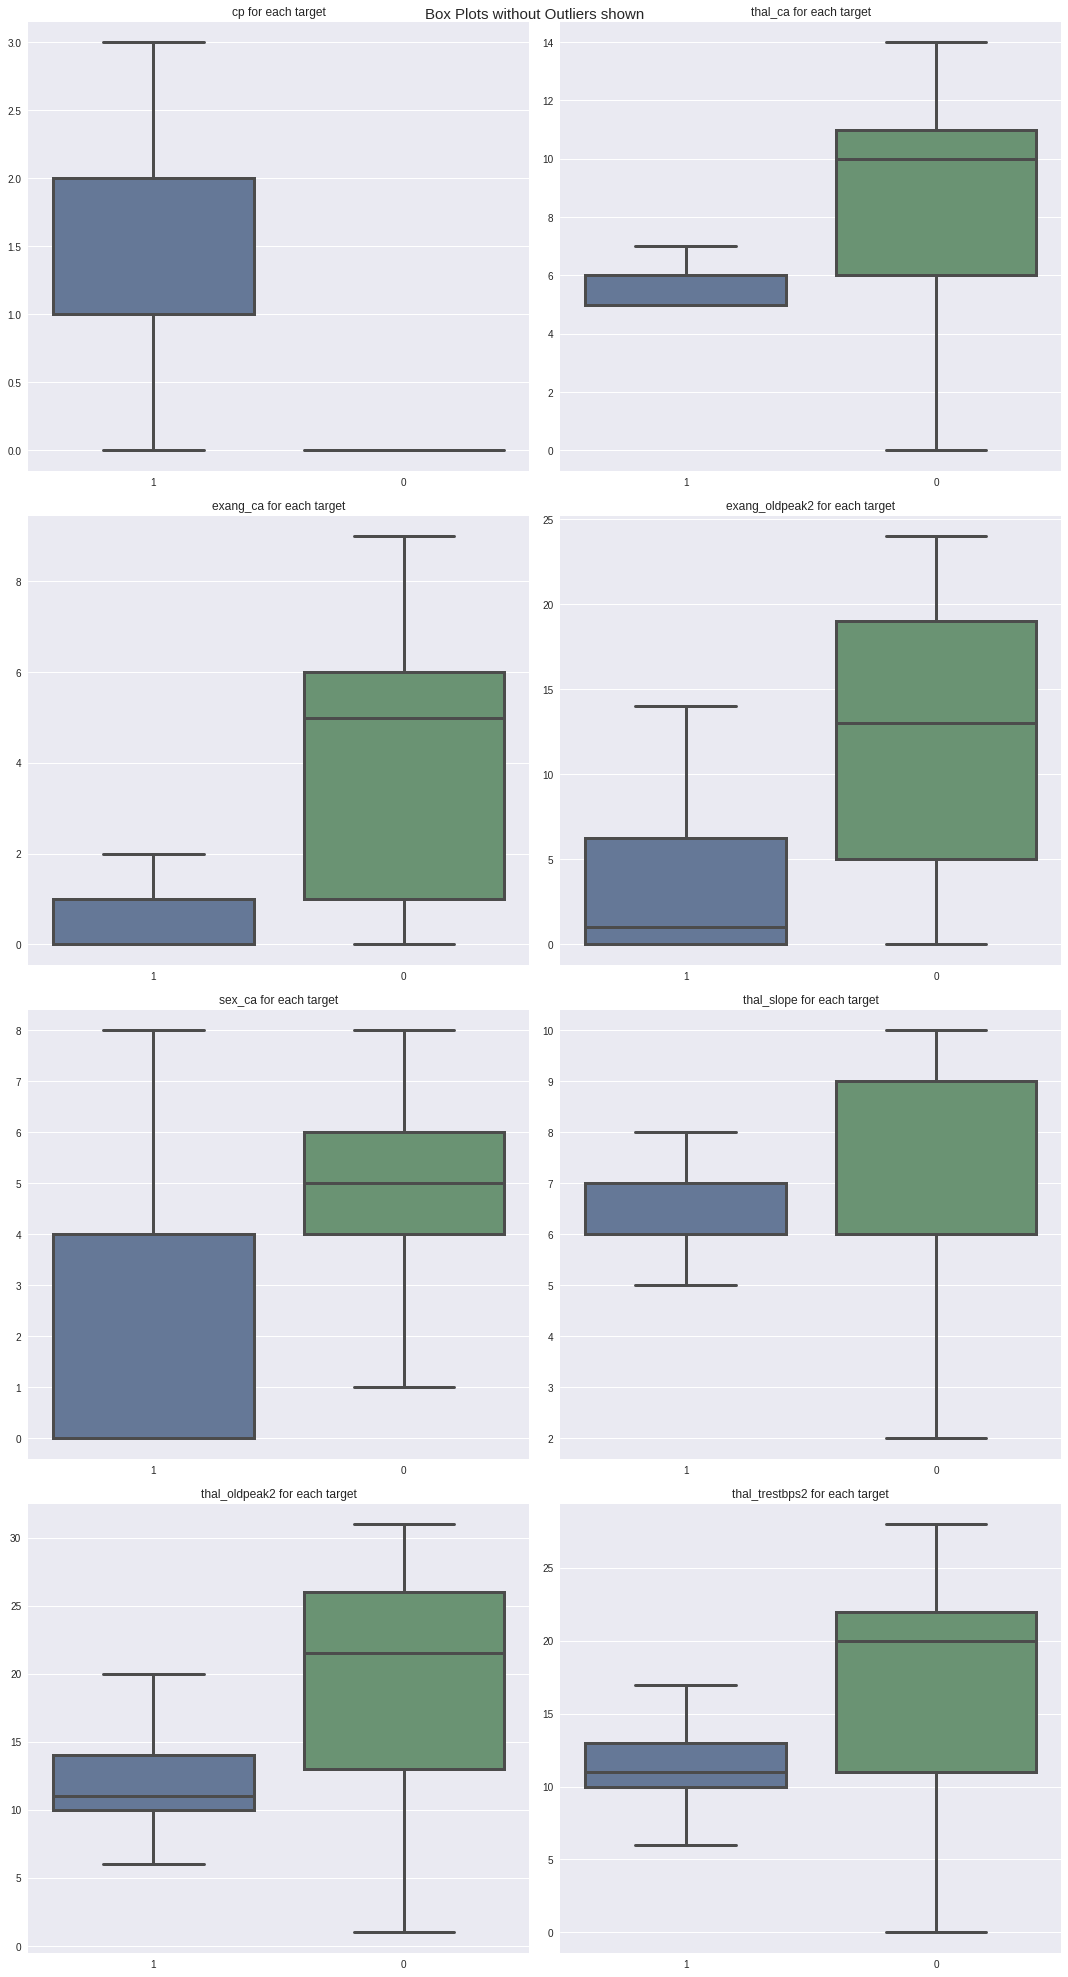

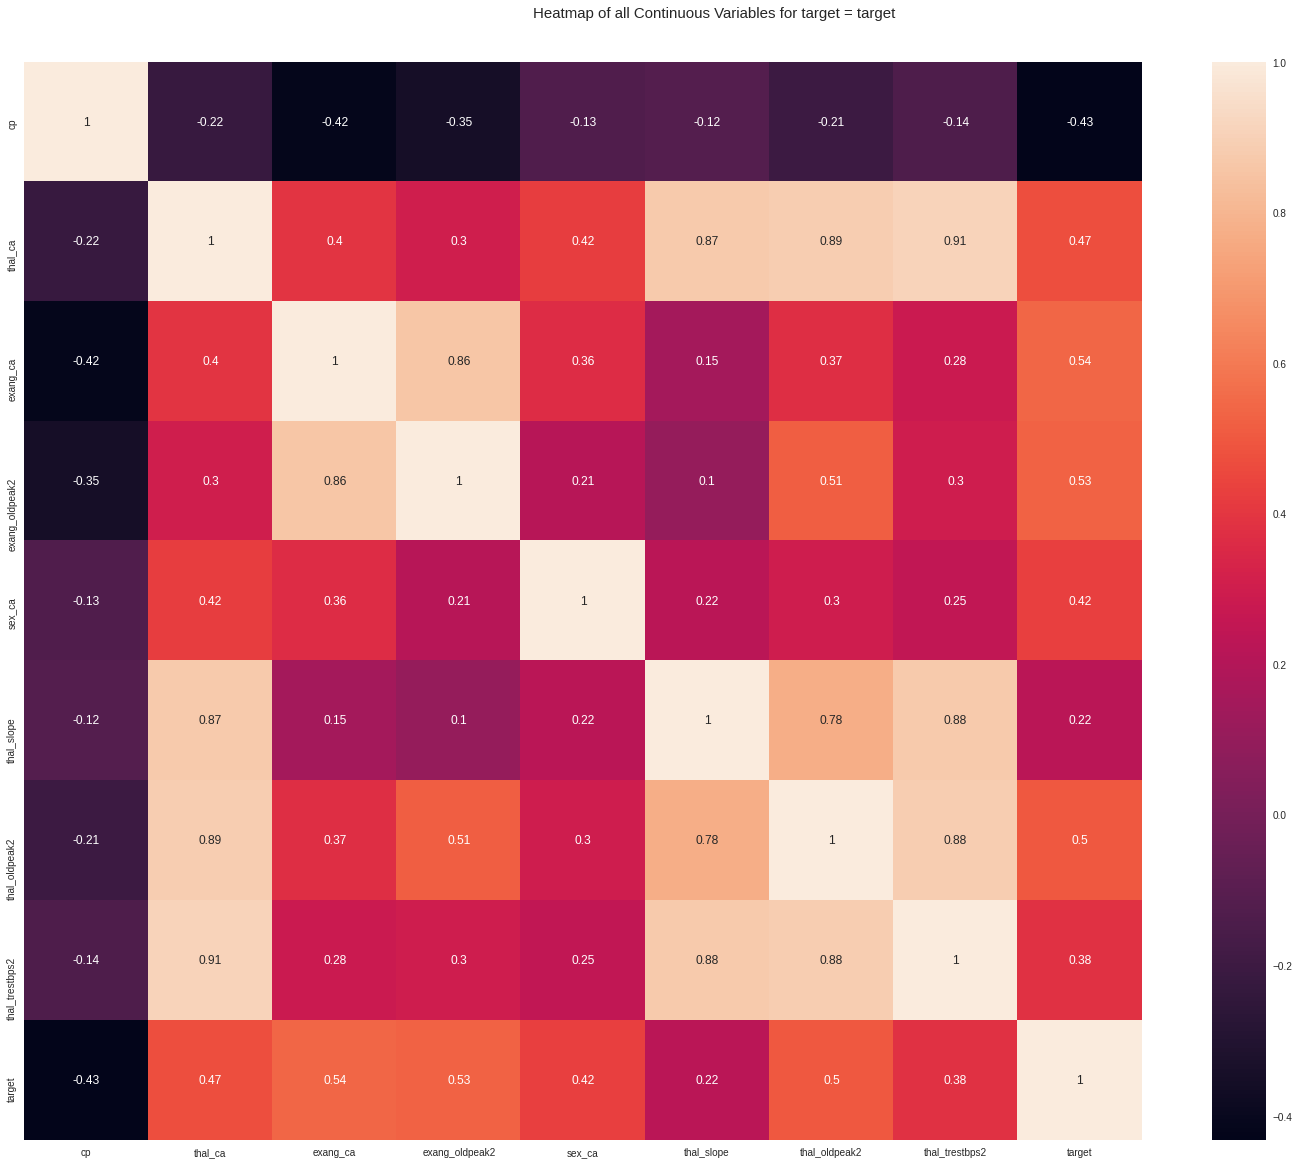

In [342]:
AV = AutoViz_Class()
data = pd.read_csv('./data_EDA.csv')
df = AV.AutoViz(filename="",sep=',', depVar='target', dfte=data, header=0, verbose=2, lowess=False, 
                chart_format='svg',  max_cols_analyzed=30)

# Pandas Profiling

In [ ]:
pp.ProfileReport(data[main_cols])

In [344]:
data[main_cols].describe()

age     thalach  thal_oldpeak2        chol          ca  \
count  302.00000  302.000000     302.000000  302.000000  302.000000   
mean    54.42053  149.569536      15.824503  246.500000    0.718543   
std      9.04797   22.903527       7.192119   51.753489    1.006748   
min     29.00000   71.000000       0.000000  126.000000    0.000000   
25%     48.00000  133.250000      10.000000  211.000000    0.000000   
50%     55.50000  152.500000      13.000000  240.500000    0.000000   
75%     61.00000  166.000000      22.750000  274.750000    1.000000   
max     77.00000  202.000000      31.000000  564.000000    4.000000   

           sex_ca  thal_chol2    trestbps  sex_oldpeak2     age2_ca  \
count  302.000000  302.000000  302.000000    302.000000  302.000000   
mean     3.447020   11.629139  131.602649     10.099338    8.788079   
std      2.217907    5.118030   17.563394      6.449657    4.619199   
min      0.000000    0.000000   94.000000      0.000000    0.000000   
25%      1.000000    8.000000  120.000000      4.000000    4.000000   
50%      4.000000   10.000000  130.000000     10.000000    8.000000   
75%      5.000000   17.000000  140.000000     15.000000   13.000000   
max      8.000000   20.000000  200.000000     22.000000   20.000000   

       restecg_cp    exang_ca          cp     age2_cp  age2_oldpeak2  \
count  302.000000  302.000000  302.000000  302.000000     302.000000   
mean     3.066225    2.357616    0.963576    9.930464      20.417219   
std      2.372794    2.670982    1.032044    3.744116      10.505722   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      0.000000    0.000000    0.000000    7.000000      11.250000   
50%      4.000000    1.000000    1.000000   10.000000      19.500000   
75%      5.000000    5.000000    2.000000   13.000000      29.000000   
max      9.000000    9.000000    3.000000   19.000000      46.000000   

           fbs_cp  fbs_oldpeak2      fbs_ca    exang_cp  exang_chol2  \
count  302.000000    302.000000  302.000000  302.000000   302.000000   
mean     1.559603      5.817881    1.463576    2.274834     7.175497   
std      1.839424      5.887366    2.171317    1.754149     4.098334   
min      0.000000      0.000000    0.000000    0.000000     0.000000   
25%      0.000000      0.000000    0.000000    1.000000     4.000000   
50%      1.000000      6.000000    0.000000    2.000000     5.000000   
75%      2.000000      9.000000    2.000000    4.000000    12.000000   
max      7.000000     23.000000    9.000000    7.000000    15.000000   

       exang_oldpeak2     thal_cp  thal_trestbps2  thal_slope     oldpeak  \
count      302.000000  302.000000      302.000000  302.000000  302.000000   
mean         7.619205    8.231788       14.331126    7.341060    1.043046   
std          7.692428    2.468253        6.138189    1.878247    1.161452   
min          0.000000    0.000000        0.000000    0.000000    0.000000   
25%          0.000000    7.000000       10.000000    6.000000    0.000000   
50%          5.000000    8.000000       12.000000    7.000000    0.800000   
75%         13.000000   10.000000       20.000000    9.000000    1.600000   
max         24.000000   13.000000       29.000000   10.000000    6.200000   

           target  
count  302.000000  
mean     0.543046  
std      0.498970  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000

# Preparing to modeling 

In [345]:
cv_n_split = 3
random_state = 40
test_train_split_part = 0.2

In [346]:
# Target
target_name = 'target'
target0 = data[target_name]
train0 = data[main_cols].drop([target_name], axis=1)

In [347]:
# For boosting model
train0b = train0.copy()

# Synthesis valid as "test" for selection models
trainb, testb, targetb, target_testb = train_test_split(train0b, target0, test_size=test_train_split_part, random_state=random_state)


In [348]:
# For models from Sklearn
scaler = MinMaxScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)
#scaler2 = StandardScaler()
scaler2 = RobustScaler()
train0 = pd.DataFrame(scaler2.fit_transform(train0), columns = train0.columns)


In [349]:
# Synthesis valid as test for selection models
train, test, target, target_test = train_test_split(train0, target0, test_size=test_train_split_part, random_state=random_state)


In [350]:
train.head(3)


age   thalach  thal_oldpeak2      chol   ca  sex_ca  thal_chol2  \
69   0.500000  0.320611      -0.235294 -0.494118  0.0    -1.0   -0.222222   
118 -0.730769  0.595420      -0.235294 -0.572549  0.0    -1.0   -0.222222   
49  -0.192308  0.229008      -0.235294 -0.101961  0.0    -1.0   -0.222222   

     trestbps  sex_oldpeak2   age2_ca  restecg_cp  exang_ca   cp   age2_cp  \
69      -0.30     -0.909091  0.555556         0.0      -0.2 -0.5  0.500000   
118     -1.25     -0.909091 -0.555556         0.2      -0.2  0.0 -0.666667   
49       0.40     -0.909091  0.000000        -0.8      -0.2 -0.5 -0.166667   

     age2_oldpeak2  fbs_cp  fbs_oldpeak2  fbs_ca  exang_cp  exang_chol2  \
69        0.535211    -0.5     -0.666667     0.0 -0.666667       -0.125   
118      -0.647887     0.0     -0.666667     0.0 -0.333333       -0.125   
49       -0.197183    -0.5     -0.666667     0.0 -0.666667       -0.125   

     exang_oldpeak2   thal_cp  thal_trestbps2  thal_slope  oldpeak  
69        -0.384615 -0.666667            -0.2         0.0     -0.5  
118       -0.384615 -0.333333            -0.4         0.0     -0.5  
49        -0.384615 -0.666667            -0.1         0.0     -0.5

In [351]:
test.head(3)

age   thalach  thal_oldpeak2      chol   ca  sex_ca  thal_chol2  \
18  -0.961538  0.564885       0.000000  0.101961  0.0     0.0   -0.111111   
112  0.653846 -0.595420       0.470588  1.137255  0.0    -1.0    1.000000   
102  0.576923  0.809160      -0.235294 -0.713725  2.0    -0.5   -0.333333   

     trestbps  sex_oldpeak2   age2_ca  restecg_cp  exang_ca   cp   age2_cp  \
18        1.0      0.545455 -0.555556         0.0      -0.2 -0.5 -0.833333   
112       0.5     -0.909091  0.555556         0.4      -0.2  0.5  0.833333   
102       0.5     -0.909091  0.777778         0.2       0.2  0.0  0.666667   

     age2_oldpeak2  fbs_cp  fbs_oldpeak2  fbs_ca  exang_cp  exang_chol2  \
18       -0.478873    -0.5      0.111111     0.0 -0.666667        0.000   
112       0.535211     0.5     -0.666667     0.0  0.000000        0.125   
102       0.535211     0.0     -0.666667     1.0 -0.333333       -0.250   

     exang_oldpeak2   thal_cp  thal_trestbps2  thal_slope  oldpeak  
18         0.076923 -0.666667             0.1         0.0   0.4375  
112       -0.384615  1.333333             1.0         1.0  -0.3750  
102       -0.384615 -0.333333             0.0         0.0  -0.5000

In [352]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 69 to 219
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             241 non-null    float64
 1   thalach         241 non-null    float64
 2   thal_oldpeak2   241 non-null    float64
 3   chol            241 non-null    float64
 4   ca              241 non-null    float64
 5   sex_ca          241 non-null    float64
 6   thal_chol2      241 non-null    float64
 7   trestbps        241 non-null    float64
 8   sex_oldpeak2    241 non-null    float64
 9   age2_ca         241 non-null    float64
 10  restecg_cp      241 non-null    float64
 11  exang_ca        241 non-null    float64
 12  cp              241 non-null    float64
 13  age2_cp         241 non-null    float64
 14  age2_oldpeak2   241 non-null    float64
 15  fbs_cp          241 non-null    float64
 16  fbs_oldpeak2    241 non-null    float64
 17  fbs_ca          241 non-null    fl

In [353]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 18 to 90
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             61 non-null     float64
 1   thalach         61 non-null     float64
 2   thal_oldpeak2   61 non-null     float64
 3   chol            61 non-null     float64
 4   ca              61 non-null     float64
 5   sex_ca          61 non-null     float64
 6   thal_chol2      61 non-null     float64
 7   trestbps        61 non-null     float64
 8   sex_oldpeak2    61 non-null     float64
 9   age2_ca         61 non-null     float64
 10  restecg_cp      61 non-null     float64
 11  exang_ca        61 non-null     float64
 12  cp              61 non-null     float64
 13  age2_cp         61 non-null     float64
 14  age2_oldpeak2   61 non-null     float64
 15  fbs_cp          61 non-null     float64
 16  fbs_oldpeak2    61 non-null     float64
 17  fbs_ca          61 non-null     floa

In [354]:
metrics_now = [1, 2, 3, 4]

In [355]:
# list of accuracy of all model - amount of metrics_now * 2 (train & test datasets)
num_models = 20
acc_train = []
acc_test = []
acc_all = np.empty((len(metrics_now)*2, 0)).tolist()
acc_all

[[], [], [], [], [], [], [], []]

In [356]:
acc_all_pred = np.empty((len(metrics_now), 0)).tolist()
acc_all_pred

[[], [], [], []]

In [357]:
# Splitting train data for model tuning with cross-validation
cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)

In [358]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [359]:
def plot_cm(target, train_pred, target_test, test_pred):
    # Building the confusion matrices
    
    def cm_calc(y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
        cm_sum = np.sum(cm, axis=1, keepdims=True)
        cm_perc = cm / cm_sum.astype(float) * 100
        annot = np.empty_like(cm).astype(str)
        nrows, ncols = cm.shape
        for i in range(nrows):
            for j in range(ncols):
                c = cm[i, j]
                p = cm_perc[i, j]
                if i == j:
                    s = cm_sum[i]
                    annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
                elif c == 0:
                    annot[i, j] = ''
                else:
                    annot[i, j] = '%.1f%%\n%d' % (p, c)
        cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
        cm.index.name = 'Actual'
        cm.columns.name = 'Predicted'
        return cm, annot

    
    # Building the confusion matrices
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=True)
    
    # Training data
    ax = axes[0]
    ax.set_title("for training data")
    cm0, annot0 = cm_calc(target, train_pred)    
    sns.heatmap(cm0, cmap= "YlGnBu", annot=annot0, fmt='', ax=ax)
    
    # Test data
    ax = axes[1]
    ax.set_title("for test (validation) data")
    cm1, annot1 = cm_calc(target_test, test_pred)
    sns.heatmap(cm1, cmap= "YlGnBu", annot=annot1, fmt='', ax=ax)
    
    fig.suptitle('CONFUSION MATRICES')
    plt.show()

In [360]:
def acc_metrics_calc(num,model,train,test,target,target_test):
    # The models selection stage
    # Calculation of accuracy of model by different metrics
    global acc_all

    ytrain = model.predict(train).astype(int)
    ytest = model.predict(test).astype(int)
    if num != 17:
        print('target = ', target[:5].values)
        print('ytrain = ', ytrain[:5])
        print('target_test =', target_test[:5].values)
        print('ytest =', ytest[:5])

    num_acc = 0
    for x in metrics_now:
        if x == 1:
            #r2_score criterion
            acc_train = round(r2_score(target, ytrain) * 100, 2)
            acc_test = round(r2_score(target_test, ytest) * 100, 2)
        elif x == 2:
            #accuracy_score criterion
            acc_train = round(accuracy_score(target, ytrain) * 100, 2)
            acc_test = round(accuracy_score(target_test, ytest) * 100, 2)
        elif x == 3:
            #rmse criterion
            acc_train = round(acc_rmse(target, ytrain) * 100, 2)
            acc_test = round(acc_rmse(target_test, ytest) * 100, 2)
        elif x == 4:
            #relative error criterion
            acc_train = round(acc_d(target, ytrain) * 100, 2)
            acc_test = round(acc_d(target_test, ytest) * 100, 2)
        
        print('acc of', metrics_all[x], 'for train =', acc_train)
        print('acc of', metrics_all[x], 'for test =', acc_test)
        acc_all[num_acc].append(acc_train) #train
        acc_all[num_acc+1].append(acc_test) #test
        num_acc += 2
    
    #  Building the confusion matrices
    plot_cm(target, ytrain, target_test, ytest)

In [361]:
def acc_metrics_calc_pred(num,model,name_model,train,test,target):
    # The prediction stage
    # Calculation of accuracy of model for all different metrics and creates of the main submission file for the best model (num=0)
    global acc_all_pred

    ytrain = model.predict(train).astype(int)
    ytest = model.predict(test).astype(int)

    print('**********')
    print(name_model)
    if num != 17:
        print('target = ', target[:15].values)
        print('ytrain = ', ytrain[:15])
        print('ytest =', ytest[:15])
    
    num_acc = 0
    for x in metrics_now:
        if x == 1:
            #r2_score criterion
            acc_train = round(r2_score(target, ytrain) * 100, 2)
        elif x == 2:
            #accuracy_score criterion
            acc_train = round(accuracy_score(target, ytrain) * 100, 2)
        elif x == 3:
            #rmse criterion
            acc_train = round(acc_rmse(target, ytrain) * 100, 2)
        elif x == 4:
            #relative error criterion
            acc_train = round(acc_d(target, ytrain) * 100, 2)

        print('acc of', metrics_all[x], 'for train =', acc_train)
        acc_all_pred[num_acc].append(acc_train) #train
        num_acc += 1
    
    # Save the submission file
    submission[target_name] = ytest
    submission.to_csv('submission_' + name_model + '.csv', index=False)   

### Tuning models and test for all features

In [362]:
def plot_learning_curve(estimator, title, X, y, cv=None, axes=None, ylim=None, 
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), random_state=0):
    """
    Generate 2 plots: 
    - the test and training learning curve, 
    - the training samples vs fit times curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    
    random_state : random_state
    
    """
    fig, axes = plt.subplots(2, 1, figsize=(20, 10))
    
    if axes is None:
        _, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)
    
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator=estimator, X=X, y=y, cv=cv,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    plt.show()
    return

### Linear Regression

In [363]:
metrics_all = {1 : 'r2_score', 2: 'acc', 3 : 'rmse', 4 : 're'}

target =  [1 1 1 1 1]
ytrain =  [0 1 0 0 1]
target_test = [1 1 1 0 1]
ytest = [0 0 0 0 0]
acc of r2_score for train = -81.82
acc of r2_score for test = -101.1
acc of acc for train = 54.77
acc of acc for test = 50.82
acc of rmse for train = 67.25
acc of rmse for test = 70.13
acc of re for train = 84.5
acc of re for test = 85.71


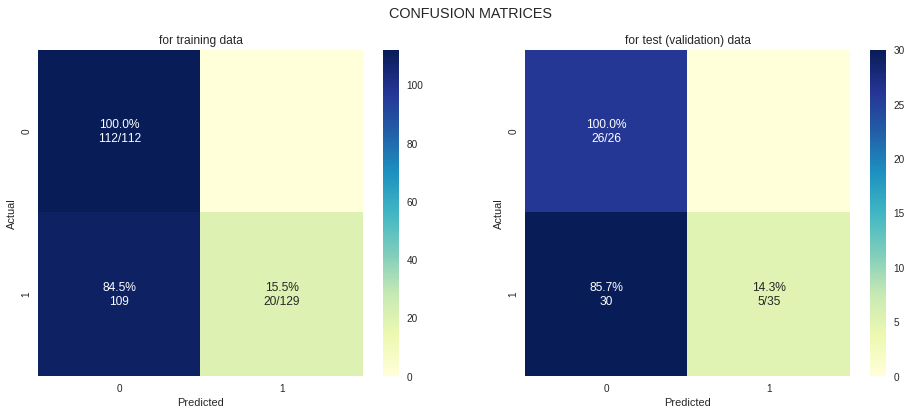

In [364]:
# Linear Regression
linreg = LinearRegression()
linreg_CV = GridSearchCV(linreg, param_grid={}, cv=cv_train, verbose=False)
linreg_CV.fit(train, target)
acc_metrics_calc(0,linreg_CV,train,test,target,target_test)


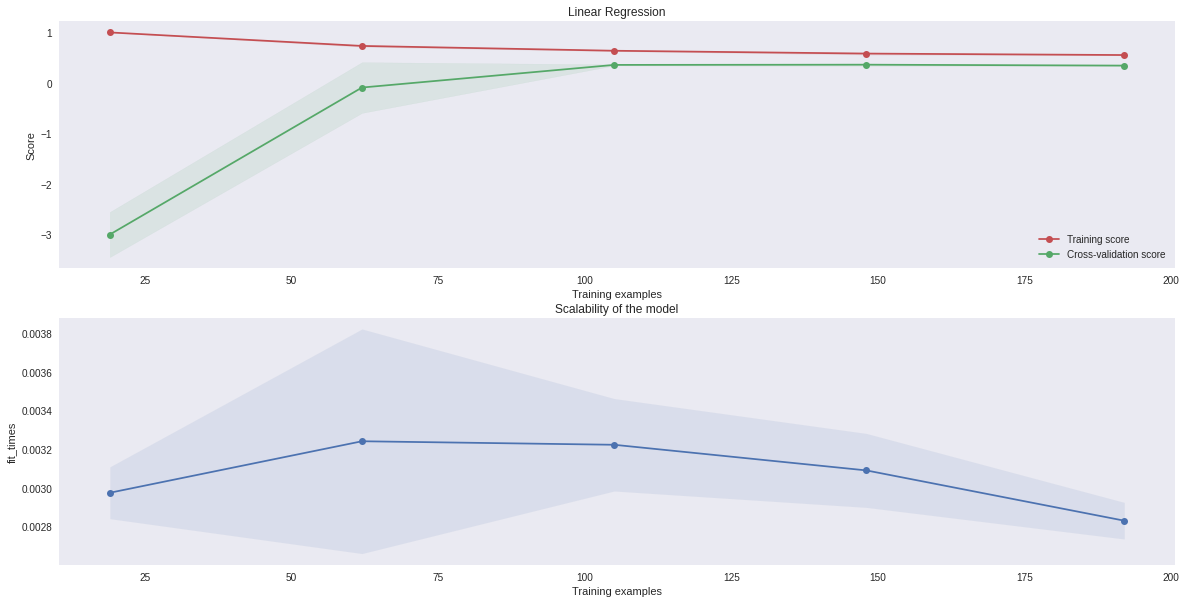

In [365]:
# Building learning curve of model
plot_learning_curve(linreg, "Linear Regression", train, target, cv=cv_train)


### Support Vector Machines 

{'kernel': 'linear', 'tol': 0.001}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 0]
acc of r2_score for train = 39.95
acc of r2_score for test = 59.78
acc of acc for train = 85.06
acc of acc for test = 90.16
acc of rmse for train = 38.65
acc of rmse for test = 31.36
acc of re for train = 27.91
acc of re for test = 17.14


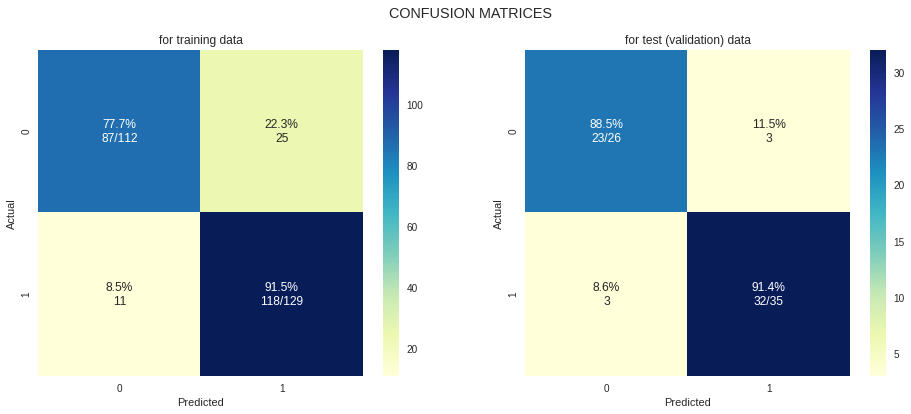

In [366]:
# Support Vector Machines

svr = SVC()
svr_CV = GridSearchCV(svr, param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                                       'tol': [1e-3]}, 
                      cv=cv_train, verbose=False)
svr_CV.fit(train, target)
print(svr_CV.best_params_)
acc_metrics_calc(1,svr_CV,train,test,target,target_test)

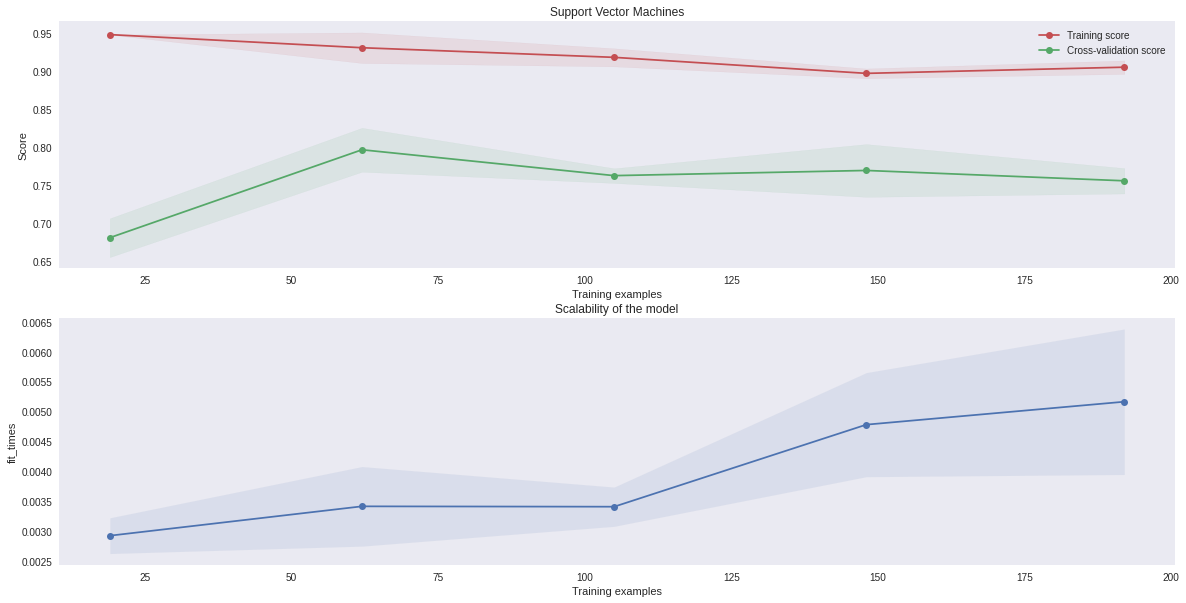

In [367]:
# Building learning curve of model
plot_learning_curve(svr, "Support Vector Machines", train, target, cv=cv_train)

### Linear SVC 

{'C': 1.0, 'dual': False}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [0 1 1 0 1]
acc of r2_score for train = 43.29
acc of r2_score for test = 46.37
acc of acc for train = 85.89
acc of acc for test = 86.89
acc of rmse for train = 37.56
acc of rmse for test = 36.21
acc of re for train = 26.36
acc of re for test = 22.86


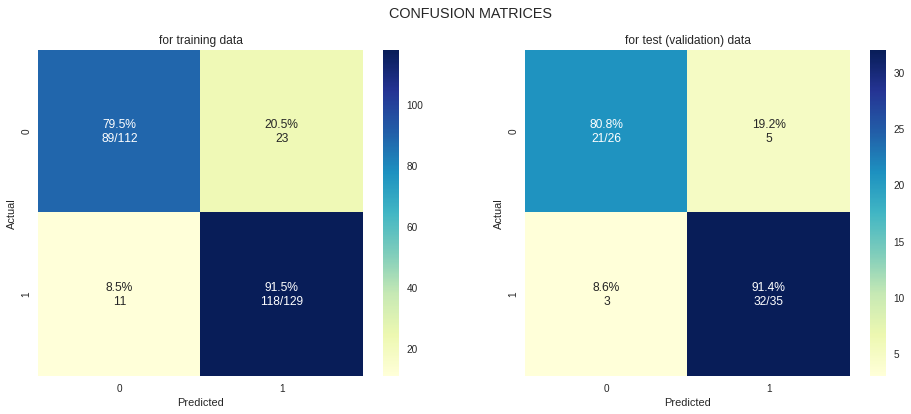

In [368]:
# Linear SVR

linear_svc = LinearSVC()
param_grid = {'dual':[False],
              'C': np.linspace(1, 15, 15)}
linear_svc_CV = GridSearchCV(linear_svc, param_grid=param_grid, cv=cv_train, verbose=False)
linear_svc_CV.fit(train, target)
print(linear_svc_CV.best_params_)
acc_metrics_calc(2,linear_svc_CV,train,test,target,target_test)

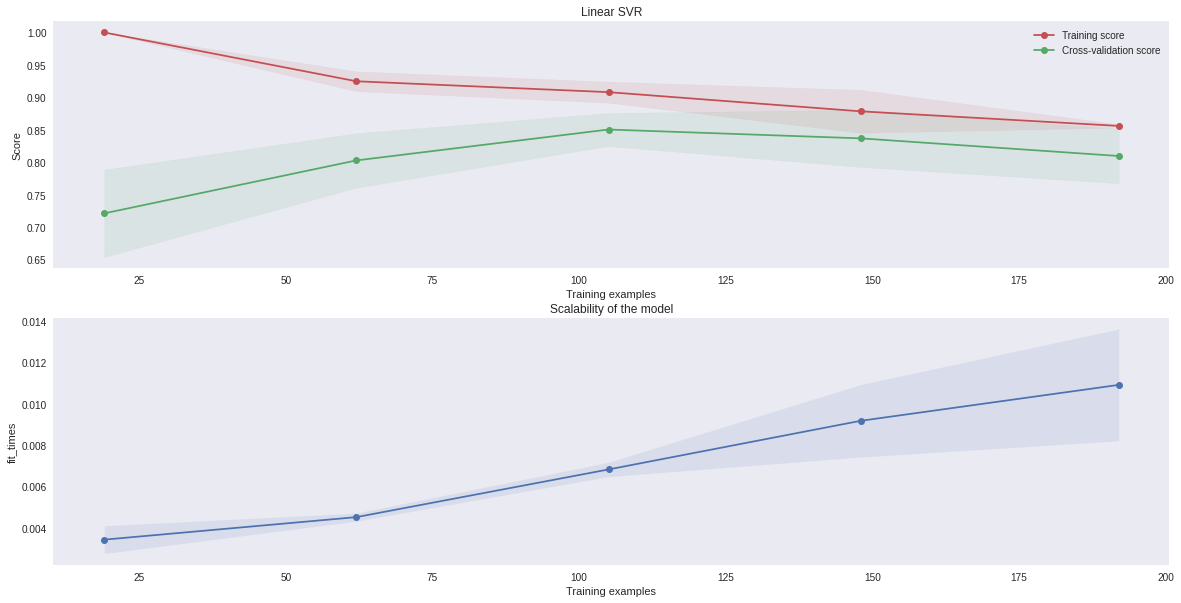

In [369]:
# Building learning curve of model
plot_learning_curve(linear_svc, "Linear SVR", train, target, cv=cv_train)


### MLP Classifier

{'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'sgd'}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [0 1 1 0 0]
acc of r2_score for train = 29.94
acc of r2_score for test = 32.97
acc of acc for train = 82.57
acc of acc for test = 83.61
acc of rmse for train = 41.75
acc of rmse for test = 40.49
acc of re for train = 32.56
acc of re for test = 28.57
CPU times: user 5.86 s, sys: 15.8 ms, total: 5.88 s
Wall time: 5.9 s


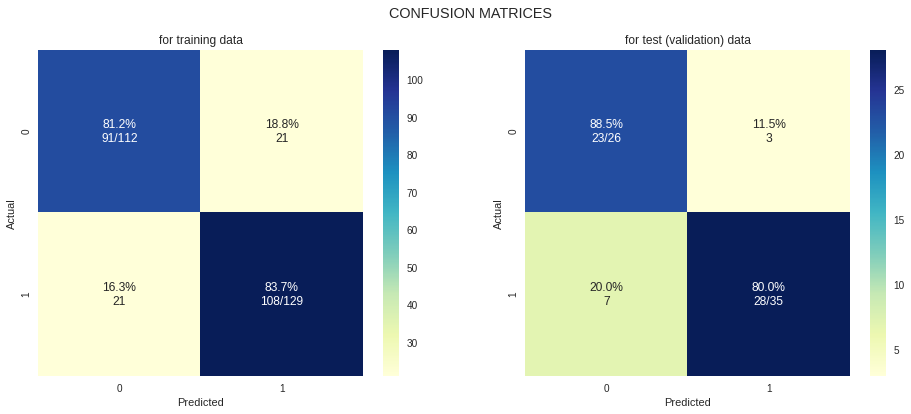

In [370]:
%%time
# MLPClassifier

mlp = MLPClassifier()
param_grid = {'hidden_layer_sizes': [i for i in range(2,5)],
              'solver': ['sgd'],
              'learning_rate': ['adaptive'],
              'max_iter': [1000]
              }
mlp_GS = GridSearchCV(mlp, param_grid=param_grid, cv=cv_train, verbose=False)
mlp_GS.fit(train, target)
print(mlp_GS.best_params_)
acc_metrics_calc(3,mlp_GS,train,test,target,target_test)


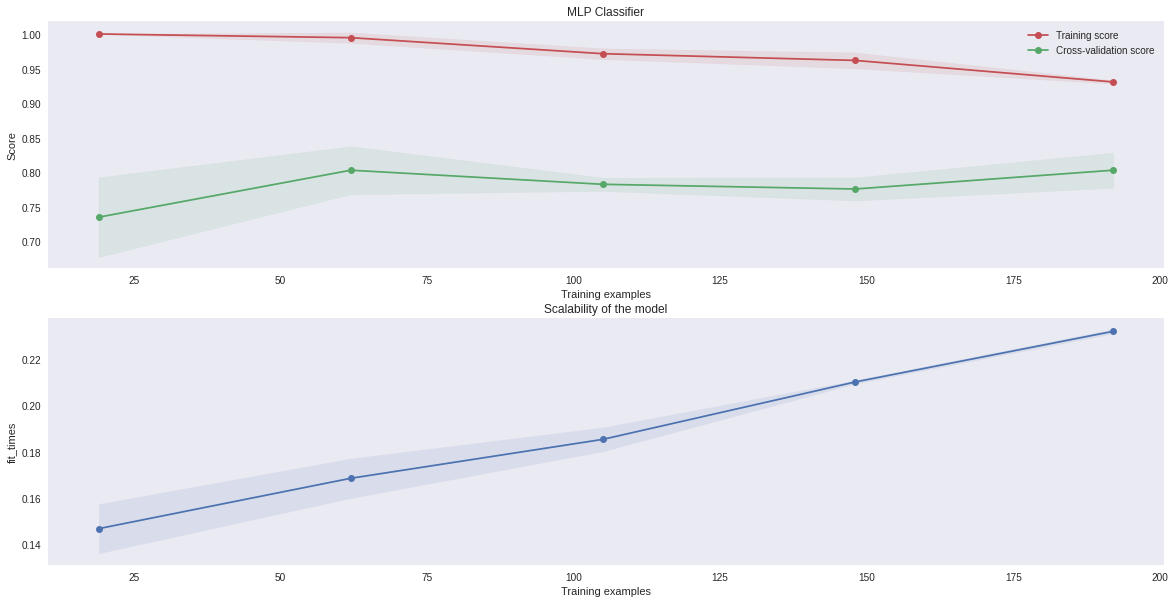

In [371]:
# Building learning curve of model
plot_learning_curve(mlp, "MLP Classifier", train, target, cv=cv_train)


### Stochastic Gradient Descent 

{'alpha': 0.035}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [0 1 1 0 1]
acc of r2_score for train = 26.61
acc of r2_score for test = 39.67
acc of acc for train = 81.74
acc of acc for test = 85.25
acc of rmse for train = 42.73
acc of rmse for test = 38.41
acc of re for train = 34.11
acc of re for test = 25.71


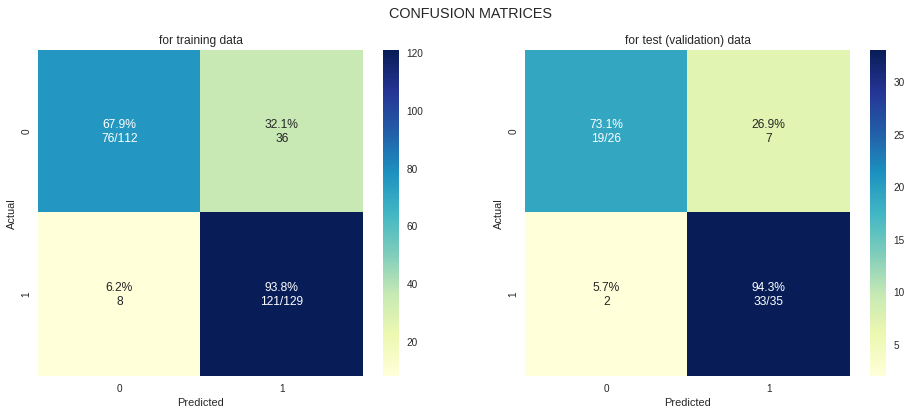

In [372]:
# Stochastic Gradient Descent

sgd = SGDClassifier(early_stopping=True)
param_grid = {'alpha': [0.035, 0.04, 0.45]}
sgd_CV = GridSearchCV(sgd, param_grid=param_grid, cv=cv_train, verbose=False)
sgd_CV.fit(train, target)
print(sgd_CV.best_params_)
acc_metrics_calc(4,sgd_CV,train,test,target,target_test)


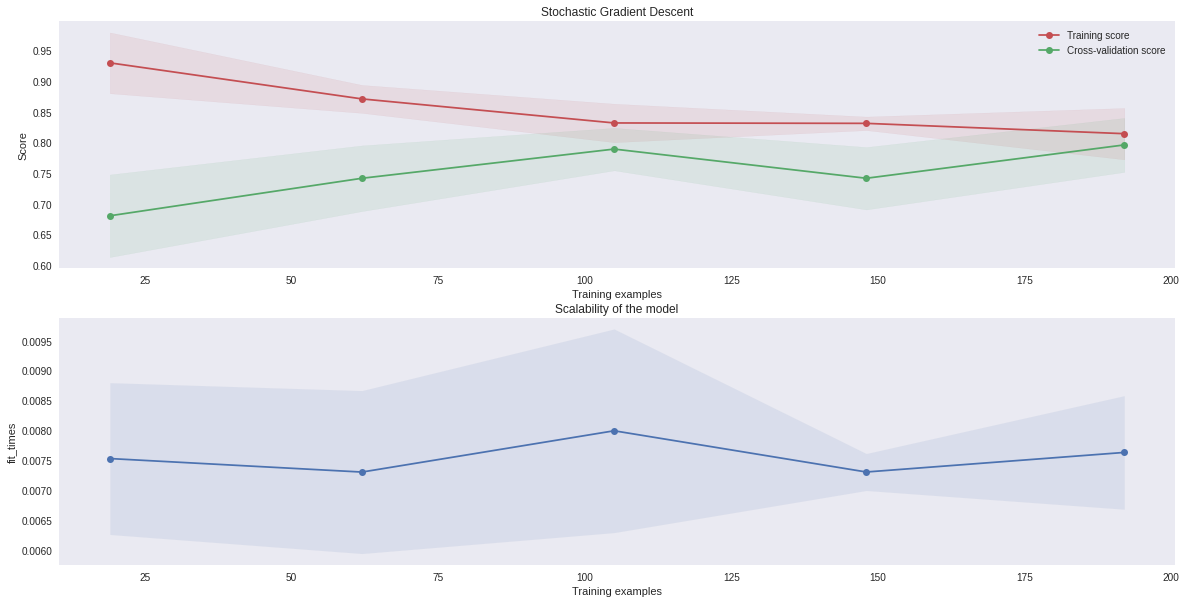

In [373]:
# Building learning curve of model
plot_learning_curve(sgd, "Stochastic Gradient Descent", train, target, cv=cv_train)

### Decision Tree Classifier

{'min_samples_leaf': 7}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 0 1]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 0]
acc of r2_score for train = 51.63
acc of r2_score for test = -0.55
acc of acc for train = 87.97
acc of acc for test = 75.41
acc of rmse for train = 34.69
acc of rmse for test = 49.59
acc of re for train = 22.48
acc of re for test = 42.86


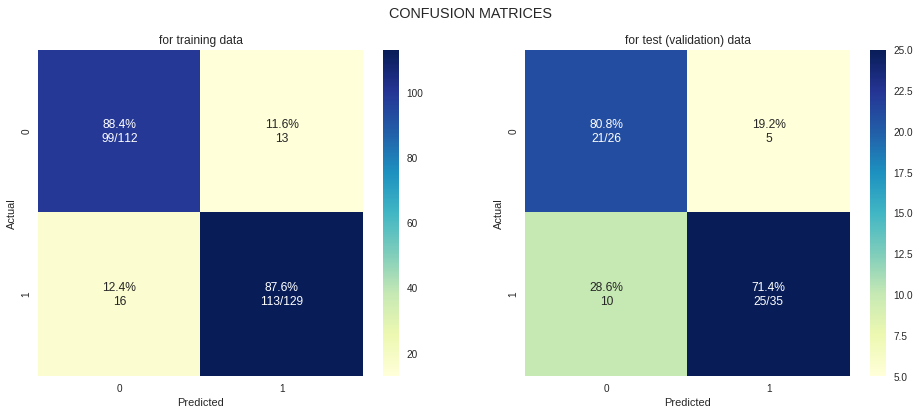

In [374]:
# Decision Tree Classifier

decision_tree = DecisionTreeClassifier()
param_grid = {'min_samples_leaf': [i for i in range(2,10)]}
decision_tree_CV = GridSearchCV(decision_tree, param_grid=param_grid, cv=cv_train, verbose=False)
decision_tree_CV.fit(train, target)
print(decision_tree_CV.best_params_)
acc_metrics_calc(5,decision_tree_CV,train,test,target,target_test)


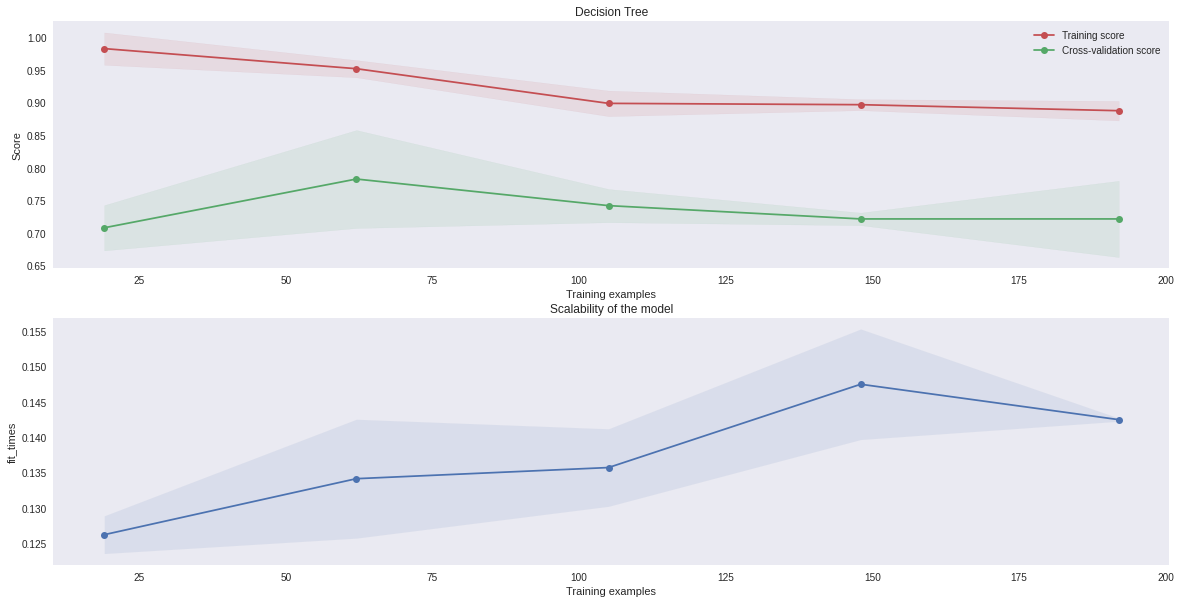

In [375]:
# Building learning curve of model
plot_learning_curve(decision_tree_CV, "Decision Tree", train, target, cv=cv_train)

### Random Forest Classifier

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 13, 'min_samples_split': 60, 'n_estimators': 40}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 41.62
acc of r2_score for test = 66.48
acc of acc for train = 85.48
acc of acc for test = 91.8
acc of rmse for train = 38.11
acc of rmse for test = 28.63
acc of re for train = 27.13
acc of re for test = 14.29
CPU times: user 59.3 s, sys: 271 ms, total: 59.6 s
Wall time: 60 s


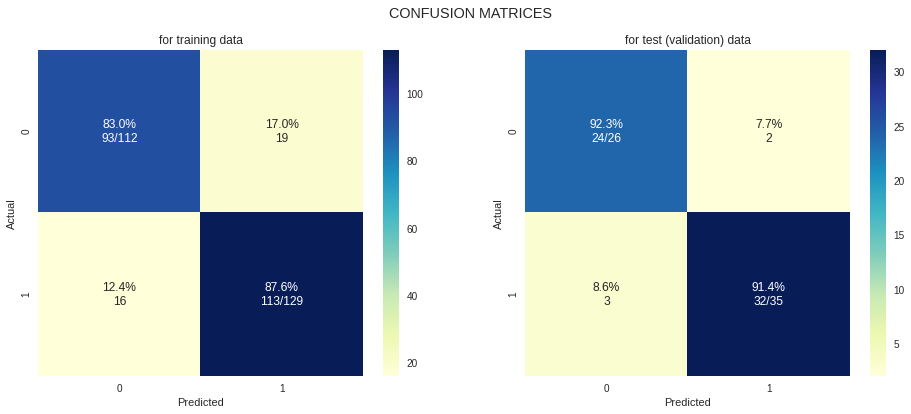

In [376]:
%%time
# Random Forest
# Parameters of model (param_grid) taken from the notebook https://www.kaggle.com/morenovanton/titanic-random-forest

random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [40, 50, 60], 'min_samples_split': [40, 50, 60, 70], 'min_samples_leaf': [12, 13, 14, 15, 16, 17], 
              'max_features': ['auto'], 'max_depth': [3, 4, 5, 6], 'criterion': ['gini'], 'bootstrap': [False]}
random_forest_CV = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                             cv=cv_train, verbose=False)
random_forest_CV.fit(train, target)
print(random_forest_CV.best_params_)
acc_metrics_calc(6,random_forest_CV,train,test,target,target_test)


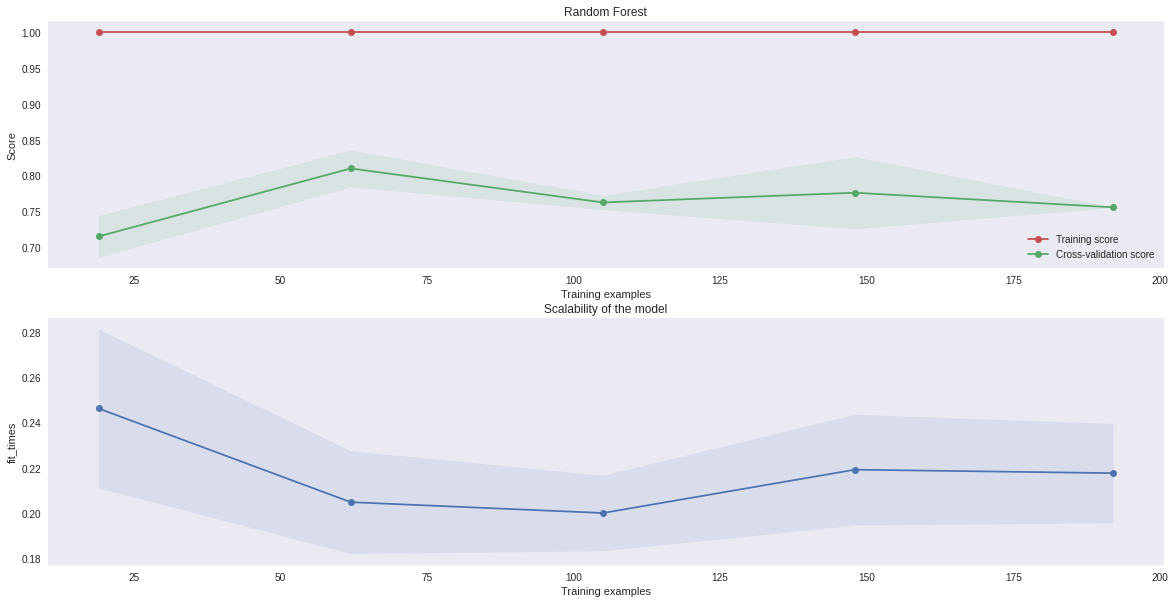

In [377]:
# Building learning curve of model
plot_learning_curve(random_forest, "Random Forest", train, target, cv=cv_train)


### XGB Classifier

Best score: 0.796
Best parameters set: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 80}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 91.66
acc of r2_score for test = 39.67
acc of acc for train = 97.93
acc of acc for test = 85.25
acc of rmse for train = 14.4
acc of rmse for test = 38.41
acc of re for train = 3.88
acc of re for test = 25.71
CPU times: user 7.05 s, sys: 28.1 ms, total: 7.07 s
Wall time: 7.1 s


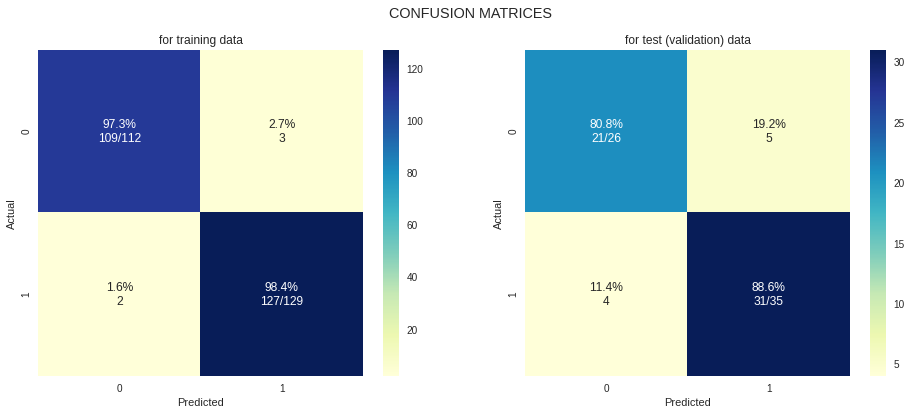

In [378]:
%%time
# XGBoost Classifier
xgb_clf = XGBClassifier(objective='reg:squarederror') 
parameters = {'n_estimators': [50, 60, 70, 80, 90], 
              'learning_rate': [0.09, 0.1, 0.15, 0.2],
              'max_depth': [3, 4, 5]}
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=cv_train).fit(trainb, targetb)
print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)
acc_metrics_calc(7,xgb_reg,trainb,testb,targetb,target_testb)


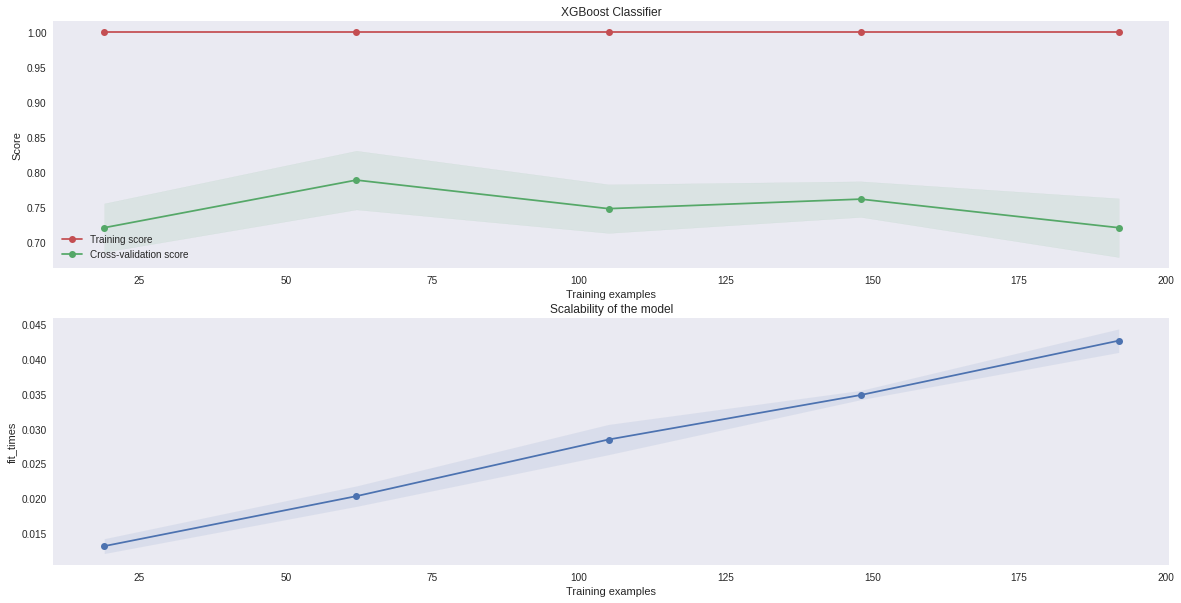

In [379]:
# Building learning curve of model
plot_learning_curve(xgb_clf, "XGBoost Classifier", trainb, targetb, cv=cv_train)

### LGBM Classifier 

In [380]:
#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(trainb, targetb, test_size=test_train_split_part, random_state=random_state)
modelL = LGBMClassifier(n_estimators=1000, num_leaves=40)
modelL.fit(Xtrain, Ztrain, eval_set=[(Xval, Zval)], early_stopping_rounds=50, verbose=True)


[1]	valid_0's binary_logloss: 0.659695
Training until validation scores don't improve for 50 rounds
[2]	valid_0's binary_logloss: 0.623338
[3]	valid_0's binary_logloss: 0.587842
[4]	valid_0's binary_logloss: 0.561533
[5]	valid_0's binary_logloss: 0.537212
[6]	valid_0's binary_logloss: 0.517563
[7]	valid_0's binary_logloss: 0.499503
[8]	valid_0's binary_logloss: 0.485195
[9]	valid_0's binary_logloss: 0.470622
[10]	valid_0's binary_logloss: 0.46338
[11]	valid_0's binary_logloss: 0.452725
[12]	valid_0's binary_logloss: 0.444876
[13]	valid_0's binary_logloss: 0.437515
[14]	valid_0's binary_logloss: 0.427035
[15]	valid_0's binary_logloss: 0.421271
[16]	valid_0's binary_logloss: 0.415948
[17]	valid_0's binary_logloss: 0.40761
[18]	valid_0's binary_logloss: 0.400665
[19]	valid_0's binary_logloss: 0.39617
[20]	valid_0's binary_logloss: 0.395586
[21]	valid_0's binary_logloss: 0.382731
[22]	valid_0's binary_logloss: 0.371455
[23]	valid_0's binary_logloss: 0.377179
[24]	valid_0's binary_logloss: 

LGBMClassifier(n_estimators=1000, num_leaves=40)

target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 66.64
acc of r2_score for test = 39.67
acc of acc for train = 91.7
acc of acc for test = 85.25
acc of rmse for train = 28.81
acc of rmse for test = 38.41
acc of re for train = 15.5
acc of re for test = 25.71


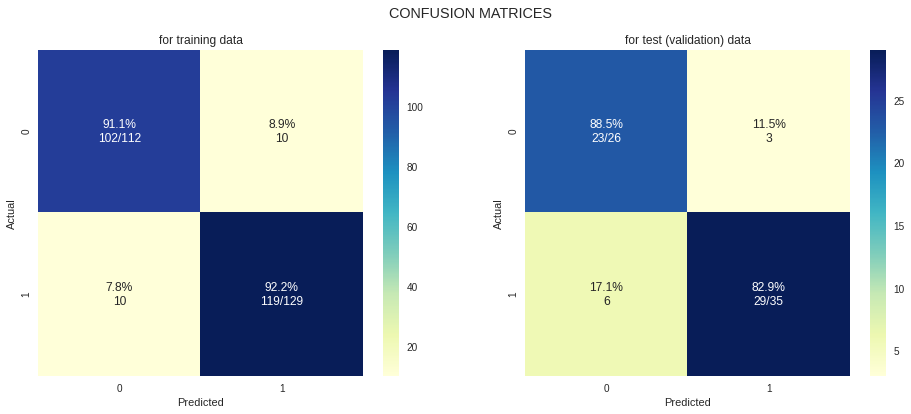

In [381]:
acc_metrics_calc(8,modelL,trainb,testb,targetb,target_testb)

In [382]:
fig =  plt.figure(figsize = (10,10))
axes = fig.add_subplot(111)
lgb.plot_importance(modelL,ax = axes,height = 0.5)
plt.show();
plt.close()

### Gradient Boosting Classifier

{'learning_rate': 0.08, 'max_depth': 4, 'min_samples_leaf': 7}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 100.0
acc of r2_score for test = 19.56
acc of acc for train = 100.0
acc of acc for test = 80.33
acc of rmse for train = 0.0
acc of rmse for test = 44.35
acc of re for train = 0.0
acc of re for test = 34.29


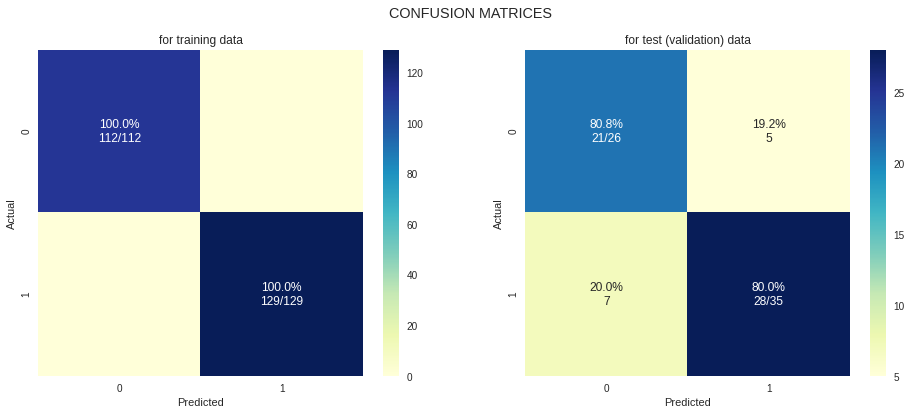

In [383]:
# Gradient Boosting Classifier

gradient_boosting = GradientBoostingClassifier()
param_grid = {'learning_rate' : [0.05, 0.06, 0.07, 0.08, 0.09],
              'max_depth': [i for i in range(2,5)],
              'min_samples_leaf': [i for i in range(3,10)]}
gradient_boosting_CV = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, 
                                    cv=cv_train, verbose=False)
gradient_boosting_CV.fit(train, target)
print(gradient_boosting_CV.best_params_)
acc_metrics_calc(9,gradient_boosting_CV,train,test,target,target_test)


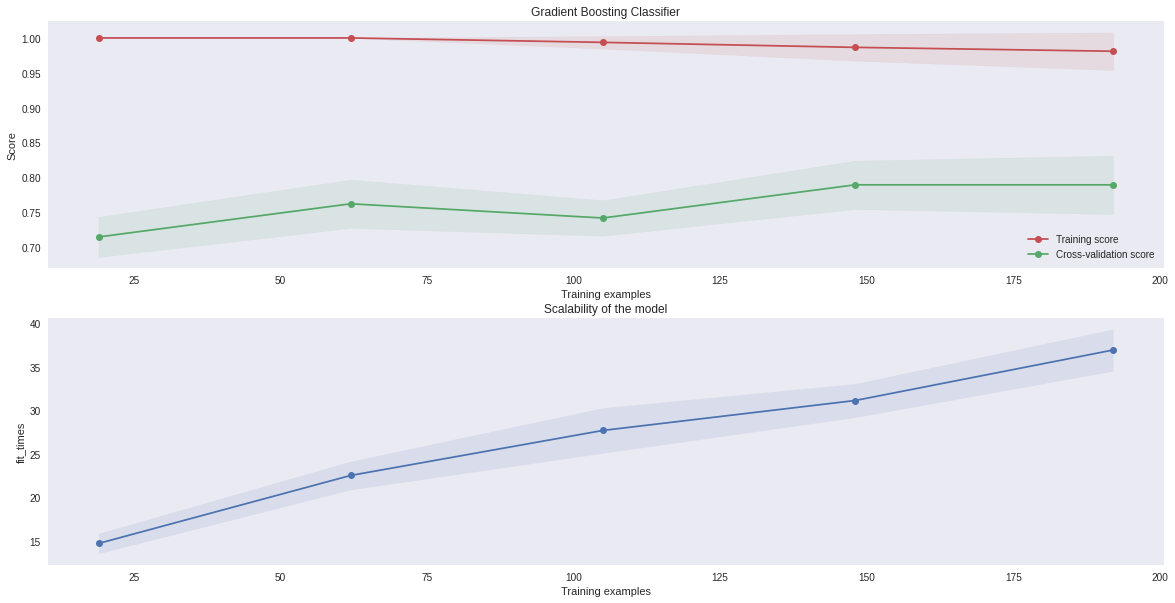

In [384]:
# Building learning curve of model
plot_learning_curve(gradient_boosting_CV, "Gradient Boosting Classifier", train, target, cv=cv_train)

### Ridge Classifier 

{'alpha': 1.5}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 41.62
acc of r2_score for test = 53.08
acc of acc for train = 85.48
acc of acc for test = 88.52
acc of rmse for train = 38.11
acc of rmse for test = 33.88
acc of re for train = 27.13
acc of re for test = 20.0


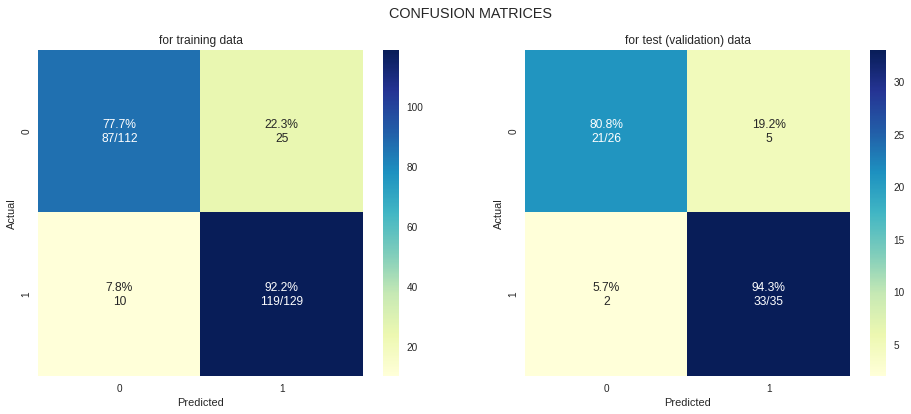

In [385]:
# Ridge Classifier

ridge = RidgeClassifier()
ridge_CV = GridSearchCV(estimator=ridge, param_grid={'alpha': np.linspace(.1, 1.5, 15)}, cv=cv_train, verbose=False)
ridge_CV.fit(train, target)
print(ridge_CV.best_params_)
acc_metrics_calc(10,ridge_CV,train,test,target,target_test)


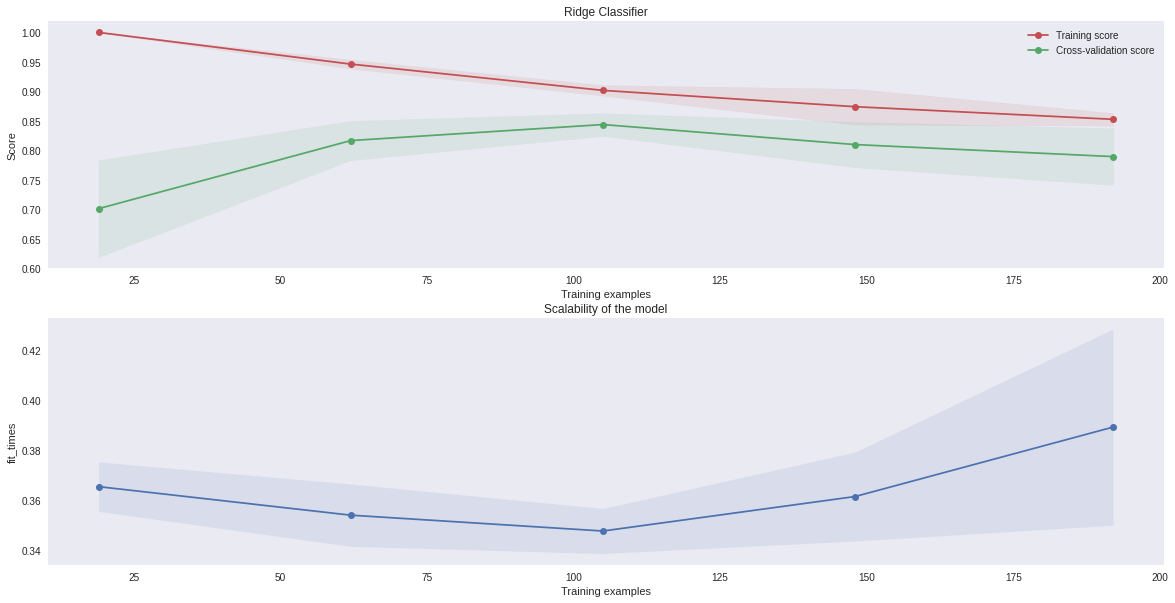

In [386]:
# Building learning curve of model
plot_learning_curve(ridge_CV, "Ridge Classifier", train, target, cv=cv_train)


### BaggingClassifier 

{'max_features': 0.85, 'n_estimators': 5, 'random_state': 40, 'warm_start': False}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [1 0 1 0 1]
acc of r2_score for train = 88.32
acc of r2_score for test = 19.56
acc of acc for train = 97.1
acc of acc for test = 80.33
acc of rmse for train = 17.04
acc of rmse for test = 44.35
acc of re for train = 5.43
acc of re for test = 34.29


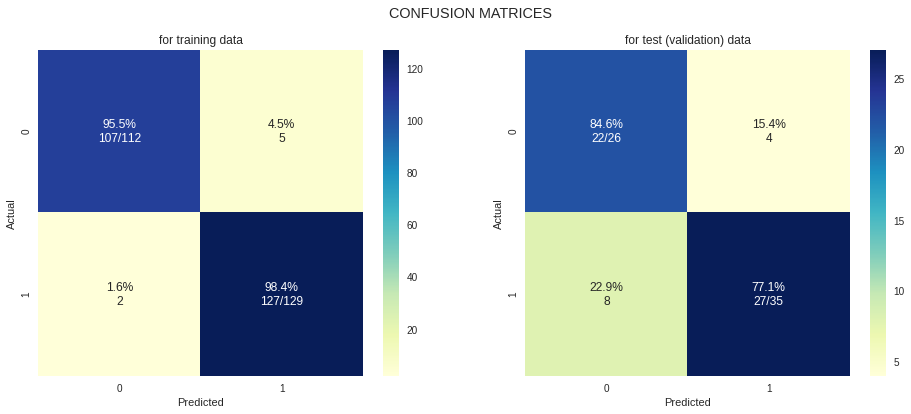

In [387]:
# Bagging Classifier

bagging = BaggingClassifier()
param_grid={'max_features': [0.85, 0.9, 0.95],
            'n_estimators': [3, 4, 5],
            'warm_start' : [False],
            'random_state': [random_state]}
bagging_CV = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=cv_train, verbose=False)
bagging_CV.fit(train, target)
print(bagging_CV.best_params_)
acc_metrics_calc(11,bagging_CV,train,test,target,target_test)


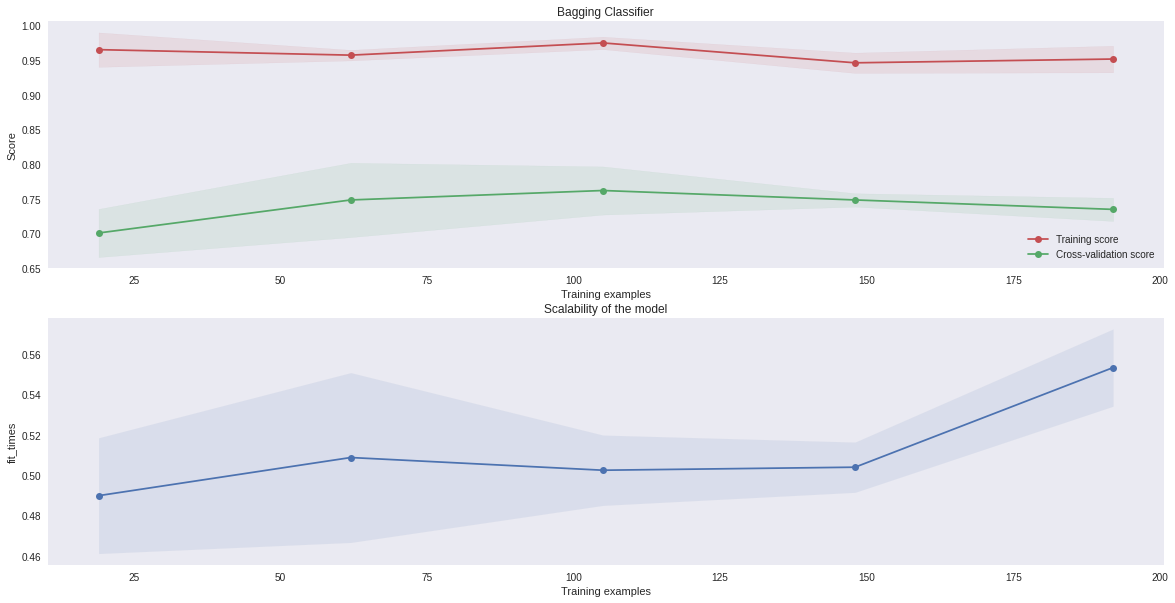

In [388]:
# Building learning curve of model
plot_learning_curve(bagging_CV, "Bagging Classifier", train, target, cv=cv_train)

### Extra Trees Classifier

{'min_samples_leaf': 11}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 38.28
acc of r2_score for test = 73.19
acc of acc for train = 84.65
acc of acc for test = 93.44
acc of rmse for train = 39.18
acc of rmse for test = 25.61
acc of re for train = 28.68
acc of re for test = 11.43


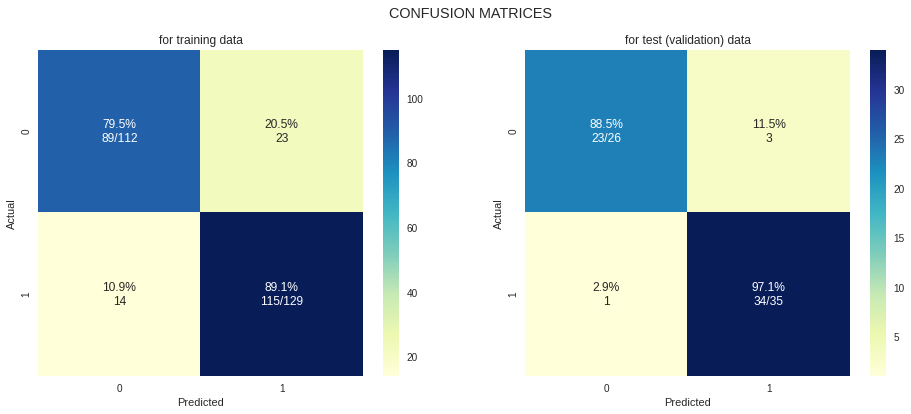

In [389]:
# Extra Trees Classifier

etr = ExtraTreesClassifier()
etr_CV = GridSearchCV(estimator=etr, param_grid={'min_samples_leaf' : [11, 12, 13, 14]}, cv=cv_train, verbose=False)
etr_CV.fit(train, target)
print(etr_CV.best_params_)
acc_metrics_calc(12,etr_CV,train,test,target,target_test)


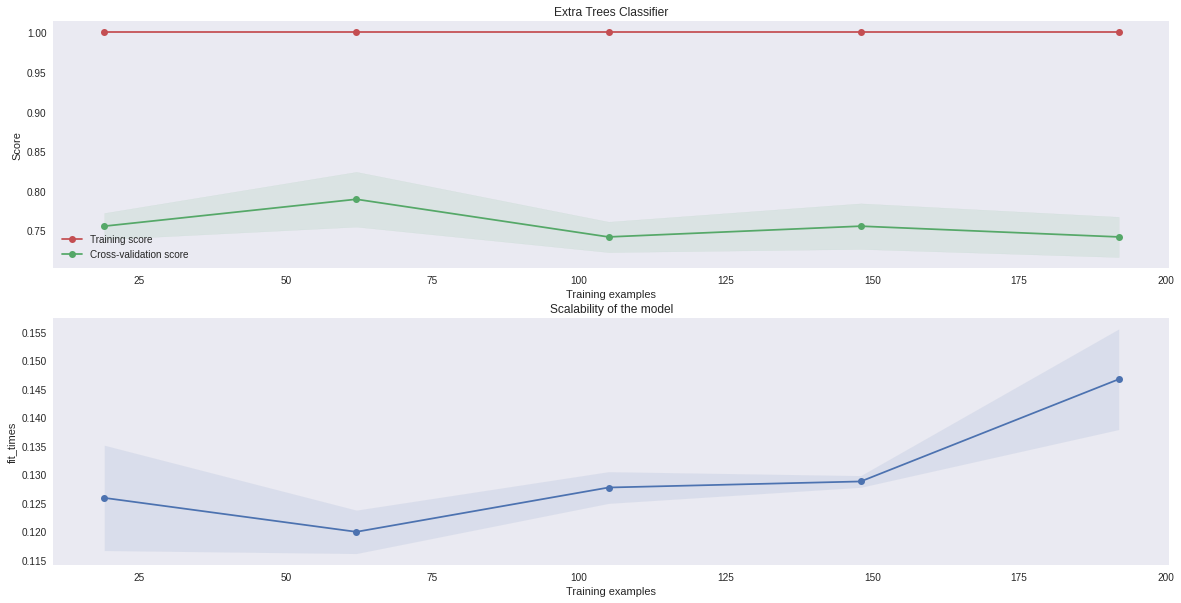

In [390]:
# Building learning curve of model
plot_learning_curve(etr, "Extra Trees Classifier", train, target, cv=cv_train)


### AdaBoost Classifier

{'learning_rate': 0.095}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 34.95
acc of r2_score for test = 53.08
acc of acc for train = 83.82
acc of acc for test = 88.52
acc of rmse for train = 40.23
acc of rmse for test = 33.88
acc of re for train = 30.23
acc of re for test = 20.0


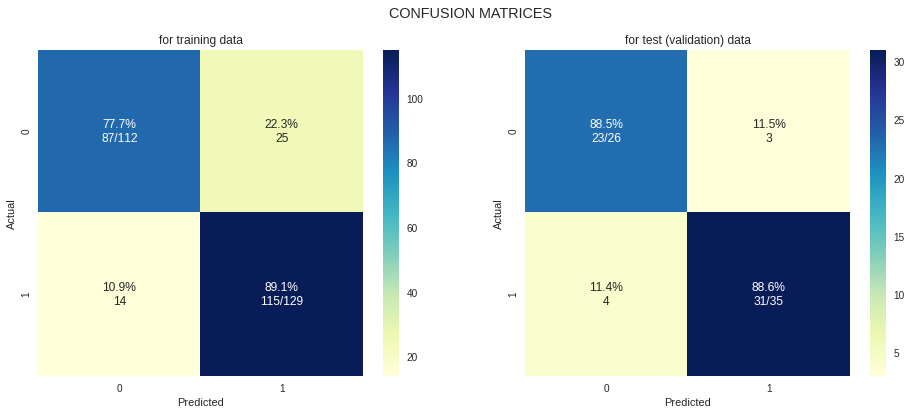

In [391]:
# AdaBoost Classifier

Ada_Boost = AdaBoostClassifier()
Ada_Boost_CV = GridSearchCV(estimator=Ada_Boost, param_grid={'learning_rate' : [0.095, 0.1, 0.101, 0.102, 0.105]}, cv=cv_train, verbose=False)
Ada_Boost_CV.fit(train, target)
print(Ada_Boost_CV.best_params_)
acc_metrics_calc(13,Ada_Boost_CV,train,test,target,target_test)


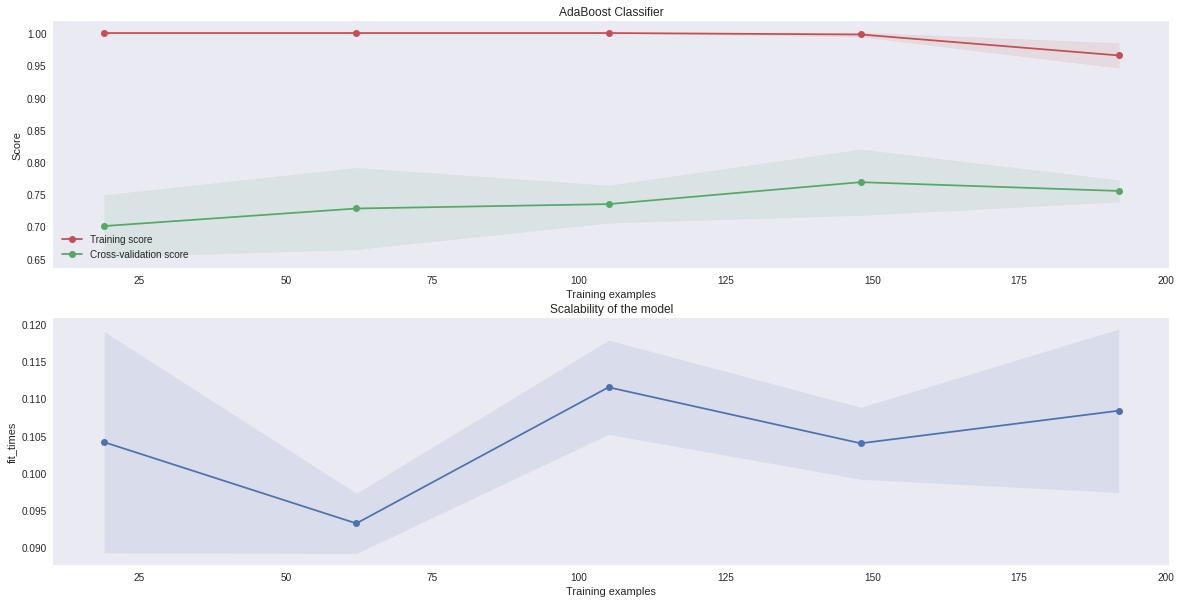

In [392]:
# Building learning curve of model
plot_learning_curve(Ada_Boost, "AdaBoost Classifier", train, target, cv=cv_train)

### Logistic Regression 

{'C': 0.3}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [0 1 1 0 0]
acc of r2_score for train = 34.95
acc of r2_score for test = 53.08
acc of acc for train = 83.82
acc of acc for test = 88.52
acc of rmse for train = 40.23
acc of rmse for test = 33.88
acc of re for train = 30.23
acc of re for test = 20.0


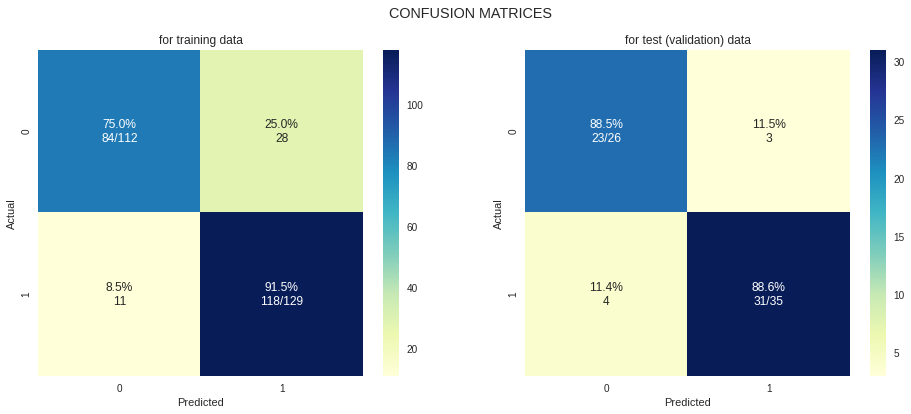

In [393]:
# Logistic Regression

logreg = LogisticRegression()
logreg_CV = GridSearchCV(estimator=logreg, param_grid={'C' : [.2, .3, .4]}, cv=cv_train, verbose=False)
logreg_CV.fit(train, target)
print(logreg_CV.best_params_)
acc_metrics_calc(14,logreg_CV,train,test,target,target_test)


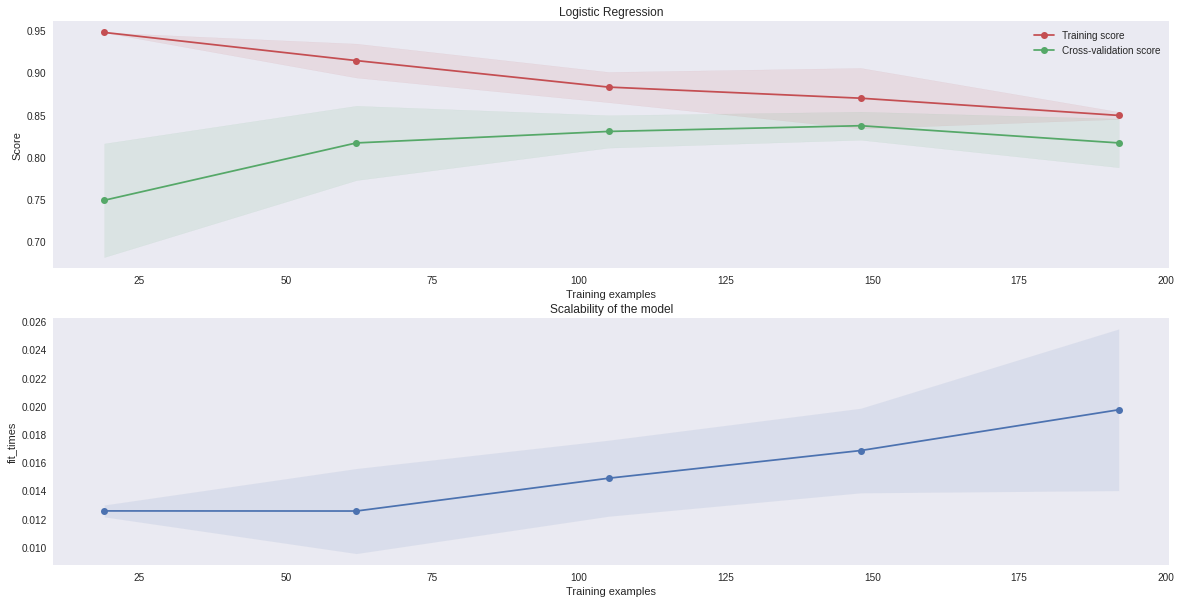

In [394]:
# Building learning curve of model
plot_learning_curve(logreg, "Logistic Regression", train, target, cv=cv_train)


### k-Nearest Neighbors (KNN)

{'n_neighbors': 3}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [1 0 1 0 1]
acc of r2_score for train = 53.29
acc of r2_score for test = 59.78
acc of acc for train = 88.38
acc of acc for test = 90.16
acc of rmse for train = 34.09
acc of rmse for test = 31.36
acc of re for train = 21.71
acc of re for test = 17.14


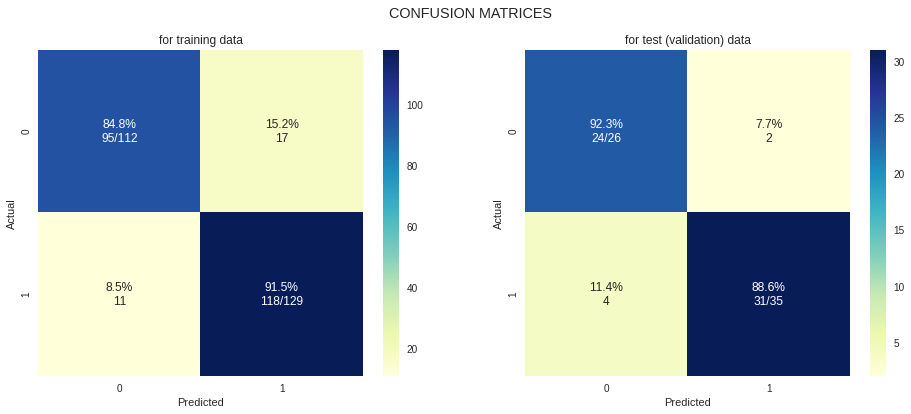

In [395]:
# KNN - k-Nearest Neighbors algorithm

knn = KNeighborsClassifier()
knn_CV = GridSearchCV(estimator=knn, param_grid={'n_neighbors': range(2, 7)}, 
                      cv=cv_train, verbose=False).fit(train, target)
print(knn_CV.best_params_)
acc_metrics_calc(15,knn_CV,train,test,target,target_test)


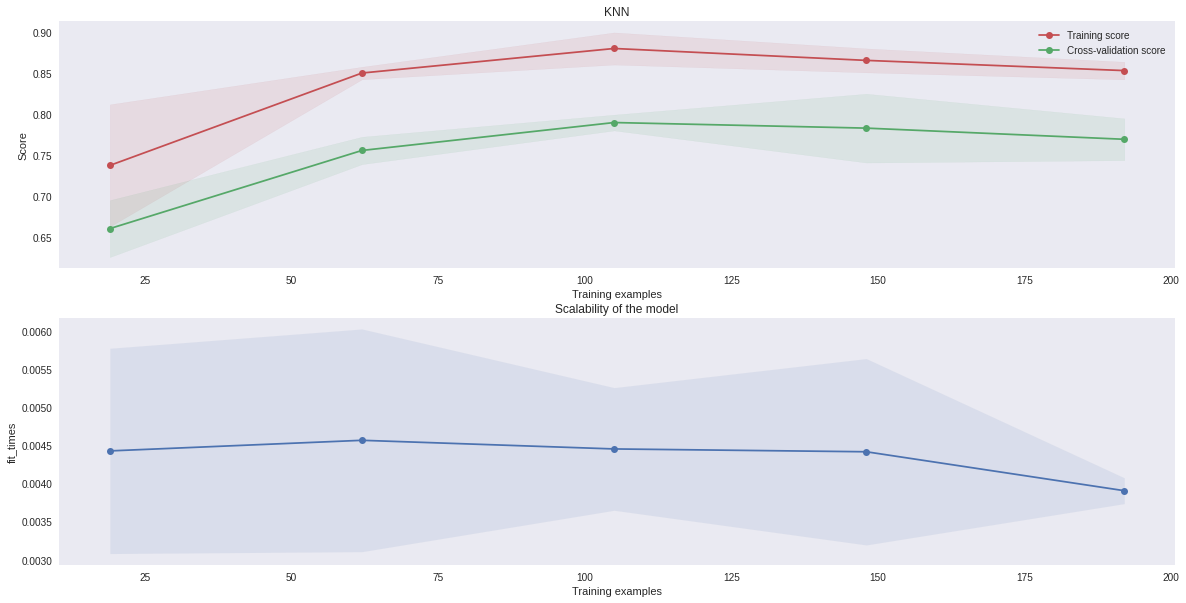

In [396]:
# Building learning curve of model
plot_learning_curve(knn, "KNN", train, target, cv=cv_train)


### Naive Bayes

{'var_smoothing': 0.0001}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 0]
acc of r2_score for train = 18.27
acc of r2_score for test = 32.97
acc of acc for train = 79.67
acc of acc for test = 83.61
acc of rmse for train = 45.09
acc of rmse for test = 40.49
acc of re for train = 37.98
acc of re for test = 28.57


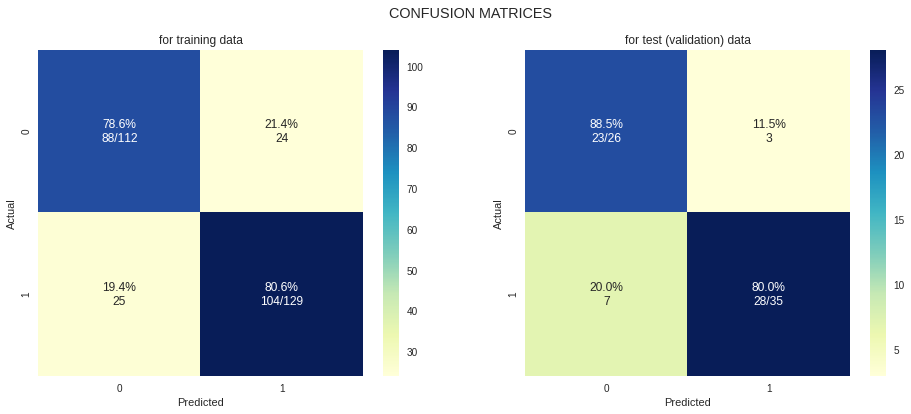

In [397]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
param_grid={'var_smoothing': [1e-4, 1e-5, 1e-6]}
gaussian_CV = GridSearchCV(estimator=gaussian, param_grid=param_grid, cv=cv_train, verbose=False)
gaussian_CV.fit(train, target)
print(gaussian_CV.best_params_)
acc_metrics_calc(16,gaussian_CV,train,test,target,target_test)

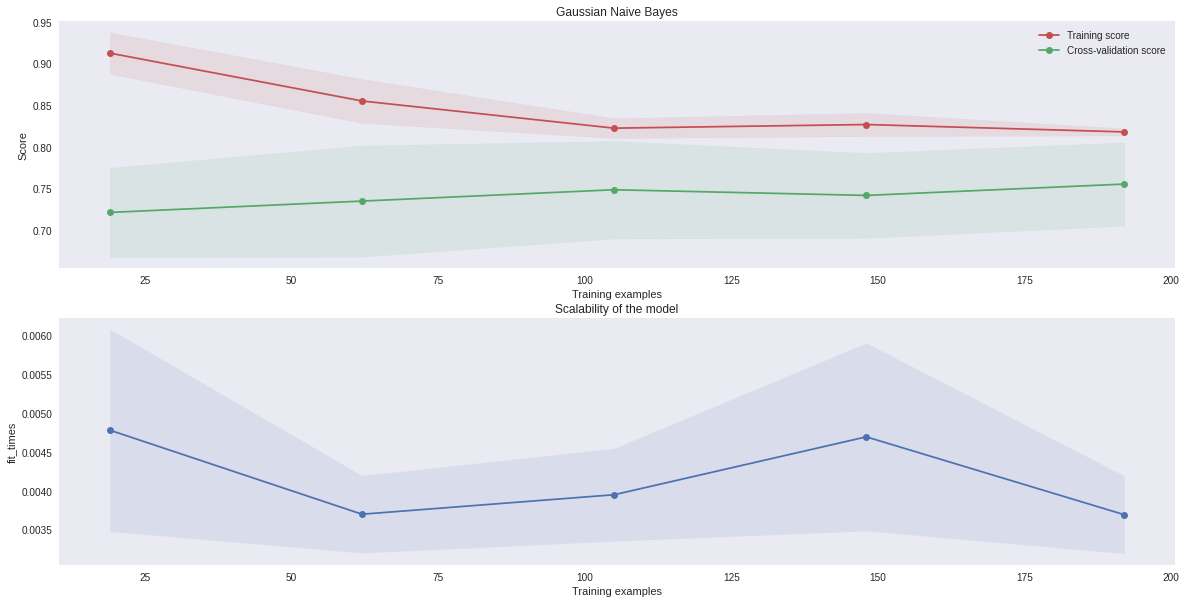

In [398]:
# Building learning curve of model
plot_learning_curve(gaussian, "Gaussian Naive Bayes", train, target, cv=cv_train)

### Neural network (NN) with Keras

Epoch 1/1500
12/12 [==============================] - 0s 16ms/step - loss: 1.0349 - accuracy: 0.4740 - val_loss: 1.1455 - val_accuracy: 0.4082
Epoch 2/1500
12/12 [==============================] - 0s 4ms/step - loss: 1.0208 - accuracy: 0.4792 - val_loss: 1.1269 - val_accuracy: 0.4082
Epoch 3/1500
12/12 [==============================] - 0s 4ms/step - loss: 1.0073 - accuracy: 0.4896 - val_loss: 1.1081 - val_accuracy: 0.4082
Epoch 4/1500
12/12 [==============================] - 0s 5ms/step - loss: 0.9938 - accuracy: 0.4844 - val_loss: 1.0900 - val_accuracy: 0.4082
Epoch 5/1500
12/12 [==============================] - 0s 3ms/step - loss: 0.9809 - accuracy: 0.4844 - val_loss: 1.0722 - val_accuracy: 0.4286
Epoch 6/1500
12/12 [==============================] - 0s 4ms/step - loss: 0.9681 - accuracy: 0.4844 - val_loss: 1.0548 - val_accuracy: 0.4286
Epoch 7/1500
12/12 [==============================] - 0s 5ms/step - loss: 0.9559 - accuracy: 0.4844 - val_loss: 1.0374 - val_accuracy: 0.4286
Epoch

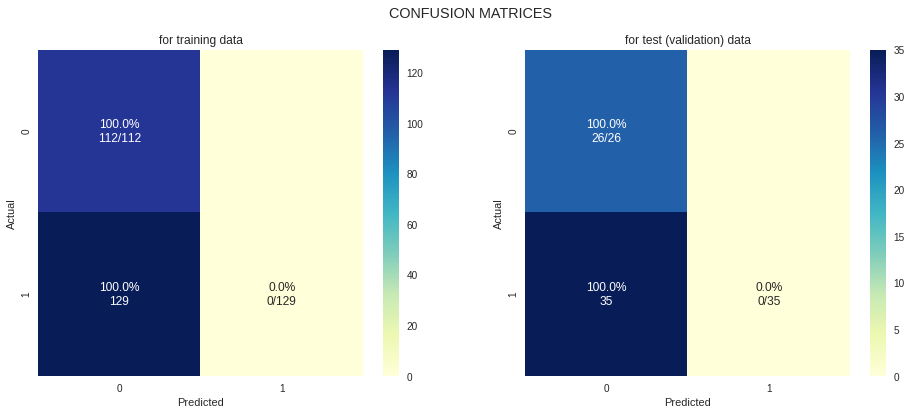

In [399]:
# Thanks to https://www.kaggle.com/skrudals/modification-of-neural-network-around-90
def build_nn(optimizer='adam'):

    # Initializing the NN
    nn = Sequential()

    # Adding the input layer and the first hidden layer of the NN
    nn.add(Dense(units=32, kernel_initializer='he_normal', activation='relu', input_shape=(len(train0.columns),)))
    # Adding the output layer
    nn.add(Dense(units=1, kernel_initializer='he_normal', activation='sigmoid'))

    # Compiling the NN
    nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return nn

Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=test_train_split_part, random_state=random_state)
nn_model = build_nn(Adam(lr=0.0001))
nn_model.fit(Xtrain, Ztrain, batch_size=16, epochs=1500, validation_data=(Xval, Zval))
acc_metrics_calc(17,nn_model,train,test,target,target_test)

### Gaussian Process Classification

{'max_iter_predict': 70, 'n_restarts_optimizer': 2, 'warm_start': False}
target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [1 0 1 0 1]
acc of r2_score for train = 93.33
acc of r2_score for test = 46.37
acc of acc for train = 98.34
acc of acc for test = 86.89
acc of rmse for train = 12.88
acc of rmse for test = 36.21
acc of re for train = 3.1
acc of re for test = 22.86


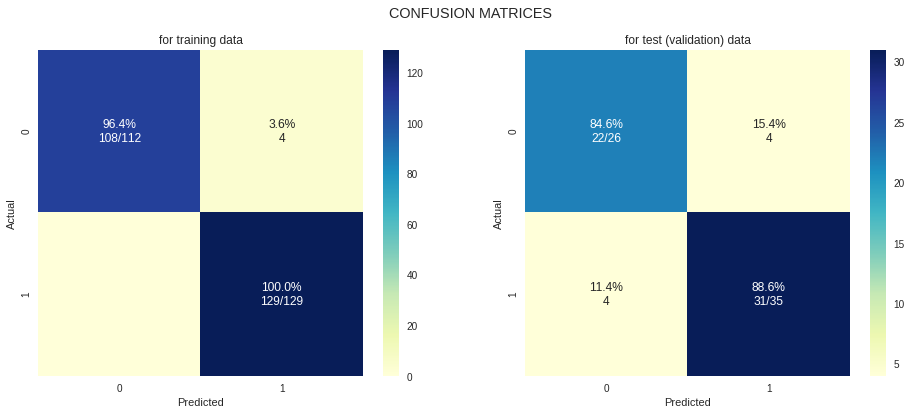

In [400]:
# Gaussian Process Classification

gpc = GaussianProcessClassifier()
param_grid = {'max_iter_predict': [70, 80, 90],
              'warm_start': [False],
              'n_restarts_optimizer': range(2,4)}
gpc_CV = GridSearchCV(estimator=gpc, param_grid=param_grid, cv=cv_train, verbose=False)
gpc_CV.fit(train, target)
print(gpc_CV.best_params_)
acc_metrics_calc(18,gpc_CV,train,test,target,target_test)


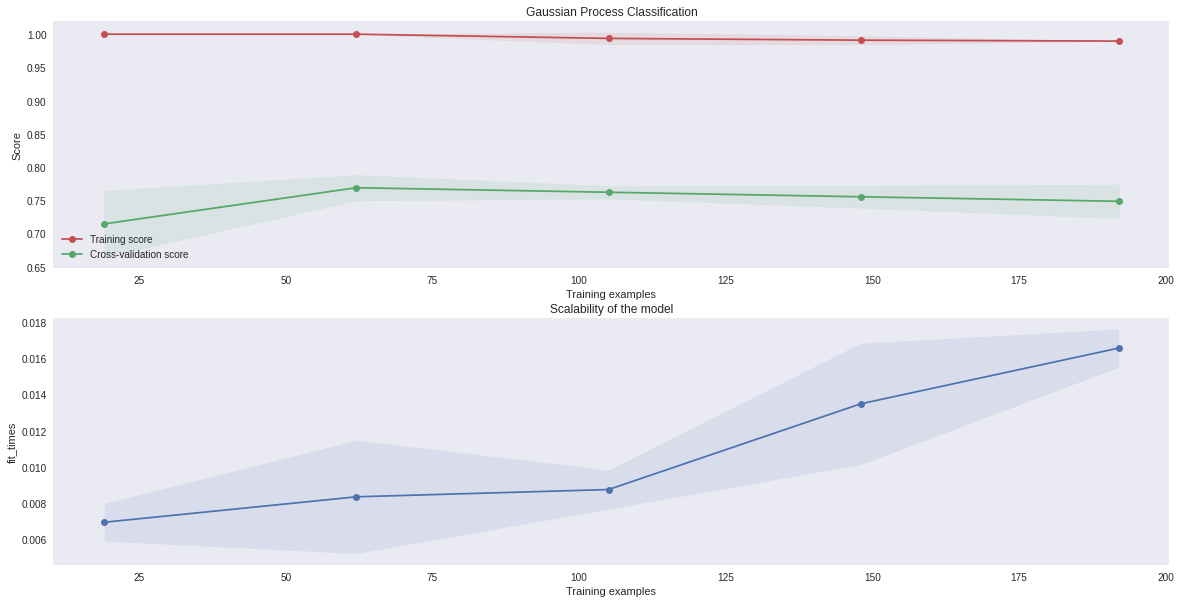

In [401]:
# Building learning curve of model
plot_learning_curve(gpc, "Gaussian Process Classification", train, target, cv=cv_train)


### Voting Classifier 

target =  [1 1 1 1 1]
ytrain =  [1 1 1 1 1]
target_test = [1 1 1 0 1]
ytest = [0 1 1 0 0]
acc of r2_score for train = 38.28
acc of r2_score for test = 53.08
acc of acc for train = 84.65
acc of acc for test = 88.52
acc of rmse for train = 39.18
acc of rmse for test = 33.88
acc of re for train = 28.68
acc of re for test = 20.0


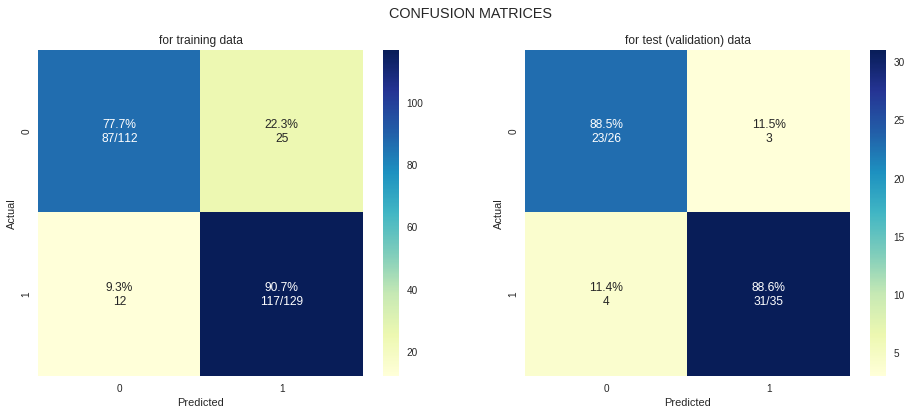

In [402]:
# Voting Classifier

Voting_ens = VotingClassifier(estimators=[('log', logreg_CV), ('mlp', mlp_GS ), ('svc', linear_svc_CV)])
Voting_ens.fit(train, target)
acc_metrics_calc(19,Voting_ens,train,test,target,target_test)

### Models evaluation

In [403]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Machines', 'Linear SVC', 
              'MLP Classifier', 'Stochastic Gradient Decent', 
              'Decision Tree Classifier', 'Random Forest Classifier',  'XGB Classifier', 'LGBM Classifier',
              'Gradient Boosting Classifier', 'RidgeCV', 'Bagging Classifier', 'ExtraTrees Classifier', 
              'AdaBoost Classifier', 'Logistic Regression',
              'KNN', 'Naive Bayes', 'NN model', 'Gaussian Process Classification',
              'VotingClassifier']})


In [404]:
for x in metrics_now:
    xs = metrics_all[x]
    models[xs + '_train'] = acc_all[(x-1)*2]
    models[xs + '_test'] = acc_all[(x-1)*2+1]
    if xs == "acc":
        models[xs + '_diff'] = models[xs + '_train'] - models[xs + '_test']
#models

In [405]:
print('Prediction accuracy for models')
ms = metrics_all[metrics_now[1]] # the first from metrics
models[['Model', ms + '_train', ms + '_test', 'acc_diff']].sort_values(by=[(ms + '_test'), (ms + '_train')], ascending=False)


Prediction accuracy for models


Model  acc_train  acc_test  acc_diff
12            ExtraTrees Classifier      84.65     93.44     -8.79
6          Random Forest Classifier      85.48     91.80     -6.32
15                              KNN      88.38     90.16     -1.78
1           Support Vector Machines      85.06     90.16     -5.10
10                          RidgeCV      85.48     88.52     -3.04
19                 VotingClassifier      84.65     88.52     -3.87
13              AdaBoost Classifier      83.82     88.52     -4.70
14              Logistic Regression      83.82     88.52     -4.70
18  Gaussian Process Classification      98.34     86.89     11.45
2                        Linear SVC      85.89     86.89     -1.00
7                    XGB Classifier      97.93     85.25     12.68
8                   LGBM Classifier      91.70     85.25      6.45
4        Stochastic Gradient Decent      81.74     85.25     -3.51
3                    MLP Classifier      82.57     83.61     -1.04
16                      Naive Bayes      79.67     83.61     -3.94
9      Gradient Boosting Classifier     100.00     80.33     19.67
11               Bagging Classifier      97.10     80.33     16.77
5          Decision Tree Classifier      87.97     75.41     12.56
0                 Linear Regression      54.77     50.82      3.95
17                         NN model      46.47     42.62      3.85

In [406]:
pd.options.display.float_format = '{:,.2f}'.format

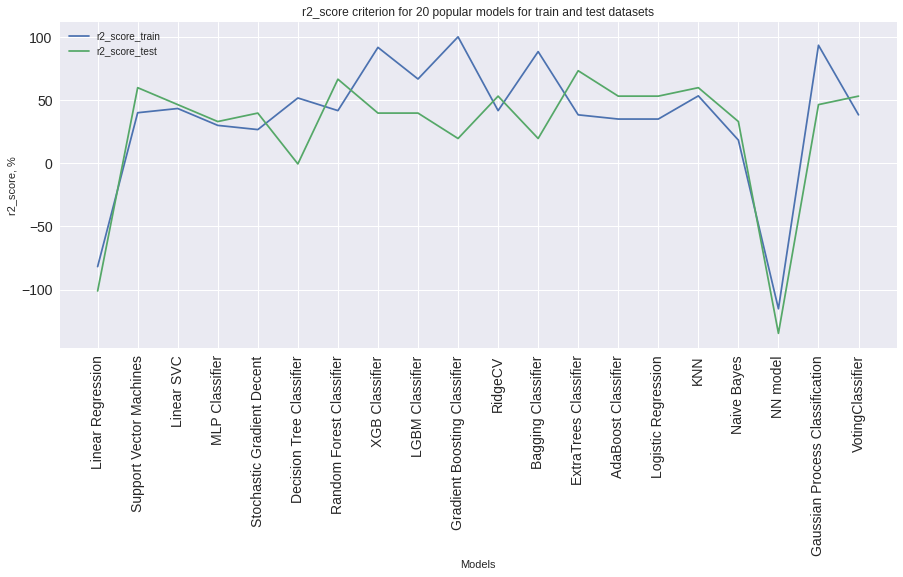

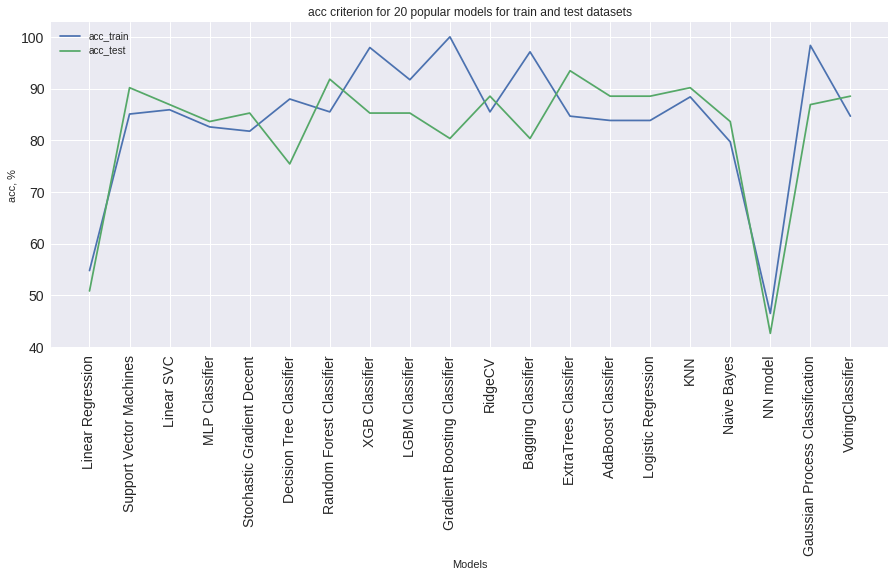

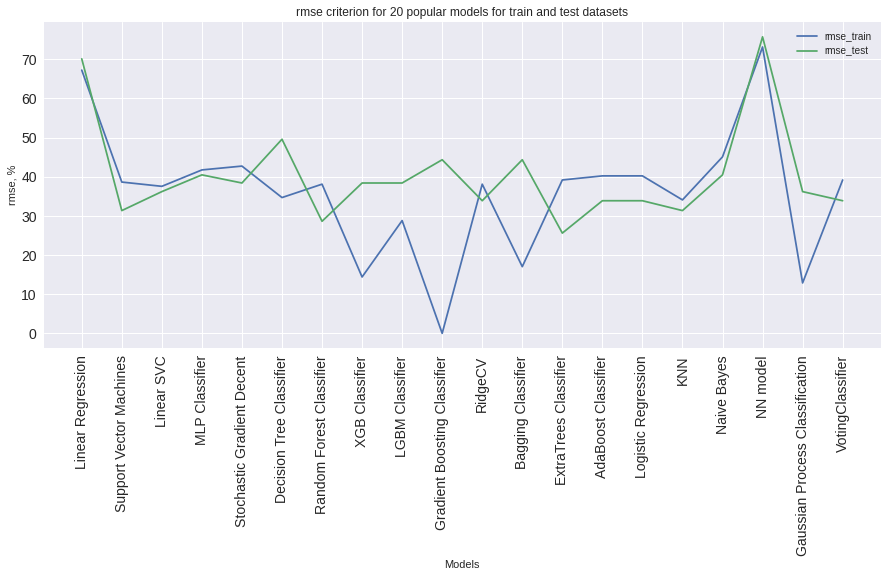

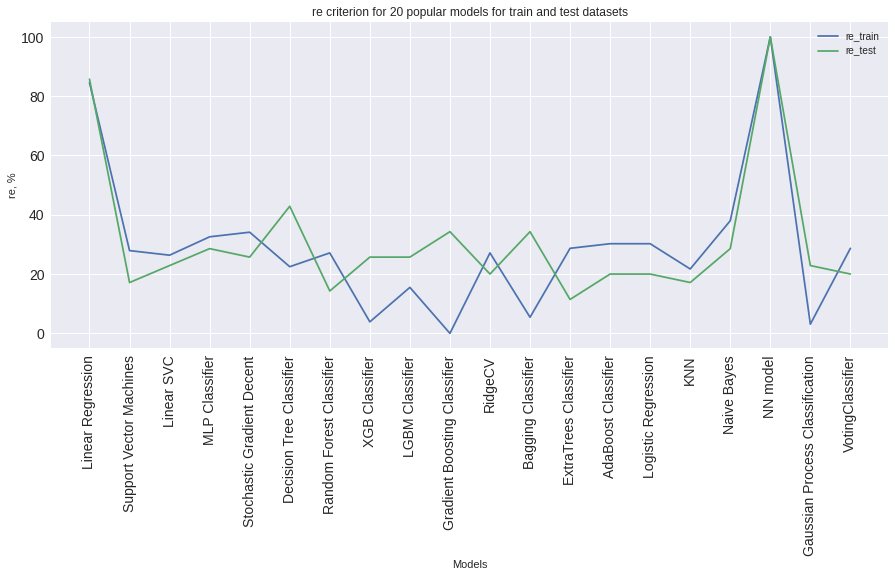

In [407]:
for x in metrics_now:   
    # Plot
    xs = metrics_all[x]
    xs_train = metrics_all[x] + '_train'
    xs_test = metrics_all[x] + '_test'
    plt.figure(figsize=[15,6])
    xx = models['Model']
    plt.tick_params(labelsize=14)
    plt.plot(xx, models[xs_train], label = xs_train)
    plt.plot(xx, models[xs_test], label = xs_test)
    plt.legend()
    plt.title(str(xs) + ' criterion for ' + str(num_models) + ' popular models for train and test datasets')
    plt.xlabel('Models')
    plt.ylabel(xs + ', %')
    plt.xticks(xx, rotation='vertical')
    plt.show()
    

### Conclusion

In [408]:
# Choose the number of metric by which the best models will be determined =>  {1 : 'r2_score', 2: 'accuracy_score', 3 : 'relative_error', 4 : 'rmse'}
metrics_main = 2 
xs = metrics_all[metrics_main]
xs_train = metrics_all[metrics_main] + '_train'
xs_test = metrics_all[metrics_main] + '_test'
print('The best models by the',xs,'criterion:')
direct_sort = False if (metrics_main >= 2) else True
models_sort = models.sort_values(by=[xs_test, xs_train], ascending=direct_sort)

The best models by the acc criterion:


### The best models:

In [409]:
# Selection the best models except VotingClassifier
models_best = models_sort[(models_sort.acc_diff < 10) & (models_sort.acc_test > 86)]
models_best[['Model', ms + '_train', ms + '_test']].sort_values(by=['acc_test'], ascending=False)

Model  acc_train  acc_test
12     ExtraTrees Classifier      84.65     93.44
6   Random Forest Classifier      85.48     91.80
15                       KNN      88.38     90.16
1    Support Vector Machines      85.06     90.16
10                   RidgeCV      85.48     88.52
19          VotingClassifier      84.65     88.52
13       AdaBoost Classifier      83.82     88.52
14       Logistic Regression      83.82     88.52
2                 Linear SVC      85.89     86.89

In [410]:
# Selection the best models from the best
models_best_best = models_best[(models_best.acc_test > 90)]
models_best_best[['Model', ms + '_train', ms + '_test']].sort_values(by=['acc_test'], ascending=False)

Model  acc_train  acc_test
12     ExtraTrees Classifier      84.65     93.44
6   Random Forest Classifier      85.48     91.80
15                       KNN      88.38     90.16
1    Support Vector Machines      85.06     90.16